---
# **Sentiment Analysis**: Sentiment Analysis on GameSphere Game Reviews
---
## **Problem Statement**:


- GameSphere, a premier digital distribution platform for video games, stands at the forefront of the gaming industry by bridging a global community of gamers.
- It hosts a vast collection of games, encouraging users to leave reviews and share recommendations within the community.
- These reviews are crucial for feedback to developers and guide potential buyers in their decisions.
- Automatically analyzing and classifying the sentiment of these reviews as positive (recommended) or negative (not recommended) can offer invaluable insights into a game's acceptance and its overall standing among users.

## **Aim**:
- The main objective of this project is to build a smart model that can correctly figure out what a review is saying about a game on GameSphere.
- The model will look at the review text and other game info to decide if a review recommends the game. Moreover, the model will calculate **how likely a review is to be positive**.
- This detailed approach helps GameSphere better understand and organize game reviews from the internet, giving a clearer view of how popular and well-received games are.
- By doing this, we're not just seeing if people like a game but how much they like it, making our analysis more precise.


## **Dataset Attributes**:


- **review_id**: A unique identifier for each review, used to distinguish between different reviews.
- **title**: The name of the game that the review is about.
- **developer**: The name of the company or individual who developed the game.
- **publisher**: The name of the company that published the game, making it available to the public.
- **tags**: A list of categories or genres associated with the game, such as 'Free to Play', 'Strategy', 'Multiplayer', etc., which give a general idea of the game's nature.
- **overview**: A brief description or summary of the game, providing insight into its content or storyline.
- **year**: The year in which the game was released, indicating its age.
- **user_review**: The actual text of the user's review, where the reviewer shares their thoughts and opinions about the game.
- **sentiment**: Indicates the reviewer's overall sentiment towards the game, categorized as 'Positive' or 'Negative'.

- **PositiveSentimentProbability**: This is the target variable and it represents the probability that a game review expresses a positive sentiment towards the game. A probability closer to 0 indicates that the sentiment will be negative and a probability closer to 1 indicates a positive sentiment.

### **Hint**: **PositiveSentimentProbability** variable is not in the dataset. You simply have to predict the probability of the positive class (Using your best chosen model) and return that probability as your final submission.



---
# **Load dataset**
---

### Import Libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import sklearn
# Import other modules as per your convenience
import os
import seaborn as sns 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import scipy.sparse
from scipy.sparse import issparse
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load the dataset
path=os.getcwd()
df_train = pd.read_csv(path+'\\data\\train.csv')
df_test = pd.read_csv(path+'\\data\\test.csv')

In [3]:
df_train.head()

review_id                                              title  \
0       4848                                             SMITE®   
1      15427  Business Tour - Board Game with Online Multipl...   
2       8236                                        Neverwinter   
3       3805                                    Team Fortress 2   
4      17261                                  School of Dragons   

                developer                     publisher  \
0      Titan Forge Games                Hi-Rez Studios    
1                Creobit                        8Floor    
2        Cryptic Studios   Perfect World Entertainment    
3                  Valve                         Valve    
4  JumpStart Games, Inc.         JumpStart Games, Inc.    

                                                tags  \
0  ['Free to Play', 'MOBA', 'Multiplayer', 'Actio...   
1  ['Free to Play', 'Board Game', 'Strategy', 'Ma...   
2  ['Free to Play', 'MMORPG', 'RPG', 'Massively M...   
3  ['Free to Play', 'Multiplayer', 'FPS', 'Action...   
4  ['Free to Play', 'Dragons', 'Adventure', 'Mult...   

                                            overview    year  \
0  Enter the Battleground of the GodsJoin the mil...  2016.0   
1  "Business Tour" simple and entertaining gamepl...  2018.0   
2                                                     2014.0   
3  "The most fun you can have online" - PC GamerI...  2014.0   
4  **Changewing Dragon now Available**Fly Fast. T...  2017.0   

                                         user_review sentiment  
0  I've played this game since before beta ended,...  Positive  
1  fun little game , but you really need to put a...  Positive  
2  First of all this is not a pay to win game. ZE...  Positive  
3  this game  have all   very funny  and tactical...  Positive  
4  This is a great game, it really is. I understa...  Positive

---
# **Questions**
---
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## **Question 1 : Data Analysis** (10 pt)
Summarize the data:
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?
- Which attributes have a lot of text?
- Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.
- Are there any attributes that might require special treatment? If so, what special treatment might they require?
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- Analyze the relationship between all the features. Use appropriate visualization techniques.
- If there is a lot of textual information, how much count certain text-heavy attributes have.
- Try using word-clouds to analyze text data.

In [4]:
df_train.shape

(17319, 9)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    17319 non-null  int64  
 1   title        17319 non-null  object 
 2   developer    17319 non-null  object 
 3   publisher    17319 non-null  object 
 4   tags         17319 non-null  object 
 5   overview     17319 non-null  object 
 6   year         17141 non-null  float64
 7   user_review  17319 non-null  object 
 8   sentiment    17319 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


- Statistical values and Distributions of attributes :

In [6]:
df_train.describe()

review_id          year
count  17319.000000  17141.000000
mean    8758.468041   2016.387900
std     5057.026518      1.389657
min        0.000000   2011.000000
25%     4381.500000   2015.000000
50%     8759.000000   2017.000000
75%    13136.500000   2018.000000
max    17513.000000   2018.000000

In [7]:
#Identifying the continuous Dtype features
column_types=df_train.dtypes
continuous_columns = column_types[column_types != 'object'].index.tolist()
print("Columns with continuous attributes:")
print(continuous_columns)

Columns with continuous attributes:
['review_id', 'year']


In [8]:
#Identifying the object Dtype features
categorical_columns = column_types[column_types == 'object'].index.tolist()
print("Columns with categorical attributes:")
print(categorical_columns)

Columns with categorical attributes:
['title', 'developer', 'publisher', 'tags', 'overview', 'user_review', 'sentiment']


In [9]:
df_train_copy=df_train.copy()

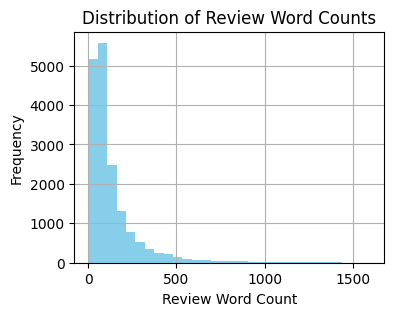

In [10]:
#Counting text in text-heavy attributes
df_train_copy['review_word_count'] = df_train_copy['user_review'].apply(lambda x: len(str(x).split()))
# Plot a histogram of review word counts
plt.figure(figsize=(4,3))
plt.hist(df_train_copy['review_word_count'], bins=30, color='skyblue')
plt.xlabel('Review Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Review Word Counts')
plt.grid(True)
plt.show()

In [11]:
df_train.isnull().sum()

review_id        0
title            0
developer        0
publisher        0
tags             0
overview         0
year           178
user_review      0
sentiment        0
dtype: int64

In [12]:
df_train.nunique()

review_id      17319
title             44
developer         42
publisher         40
tags              44
overview          43
year               8
user_review    17315
sentiment          2
dtype: int64

In [13]:
df_train['title'].nunique()

44

In [14]:
df_train['title'].value_counts()

title
Robocraft                                             832
Eternal Card Game                                     786
Heroes & Generals                                     736
Fractured Space                                       711
War Thunder                                           711
Bless Online                                          707
The Elder Scrolls®: Legends™                          561
Neverwinter                                           539
AdventureQuest 3D                                     517
theHunter Classic                                     513
Creativerse                                           486
DCS World Steam Edition                               484
Infestation: The New Z                                474
Team Fortress 2                                       473
PlanetSide 2                                          463
SMITE®                                                452
Path of Exile                                         451
Fallout 

In [15]:
df_train.select_dtypes(include=['float64', 'int64']).applymap(np.isinf).sum().sum()

0

- Distribution of numerical columns

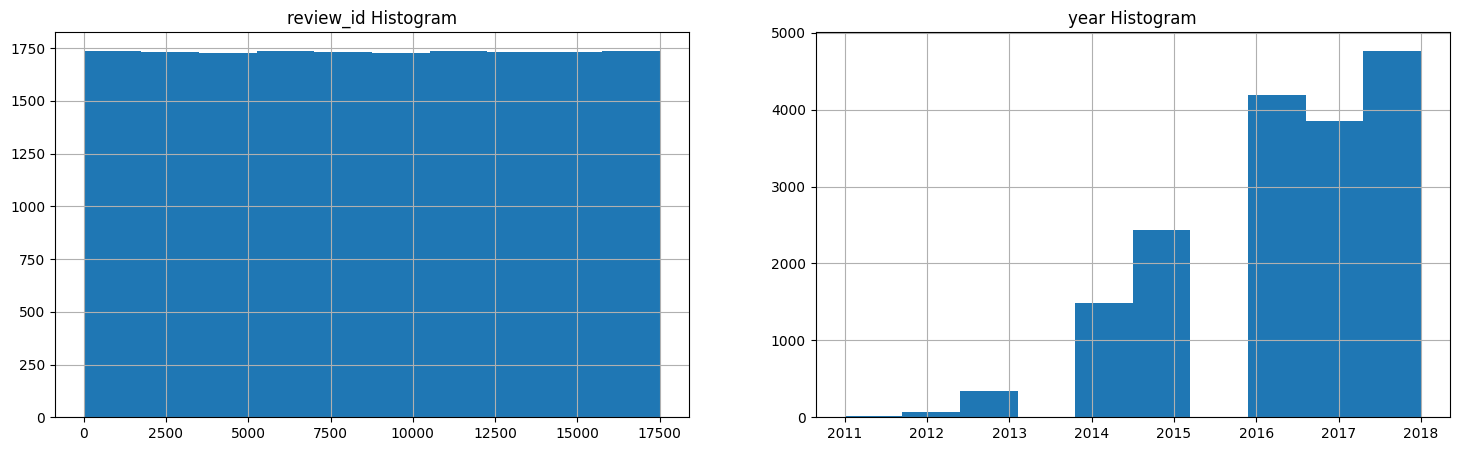

In [16]:
#Using Data visualization
#1. Histogram
fig, axes = plt.subplots(1,2,figsize=(18, 5))
for i, column in enumerate(continuous_columns[:3]):
    df_train[column].hist(ax=axes[i])
    axes[i].set_title(f'{column} Histogram')
plt.show()

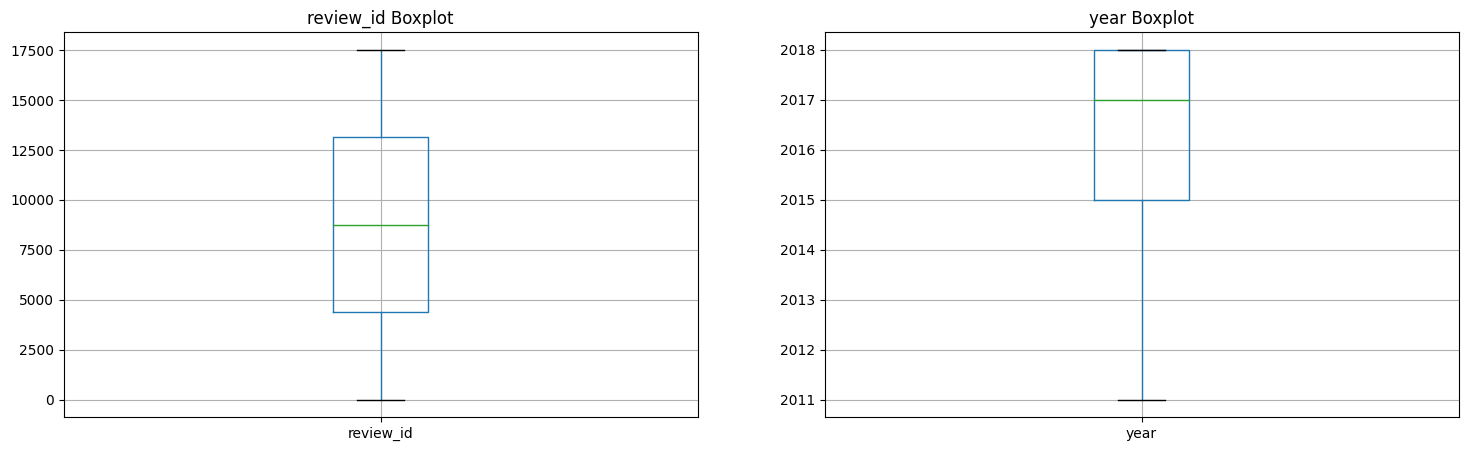

In [17]:
#2. Boxplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
for i, column in enumerate(continuous_columns[:3]):
    df_train.boxplot(column=column,ax=axes[i])
    axes[i].set_title(f'{column} Boxplot')
plt.show()

- Distribution of categorical columns

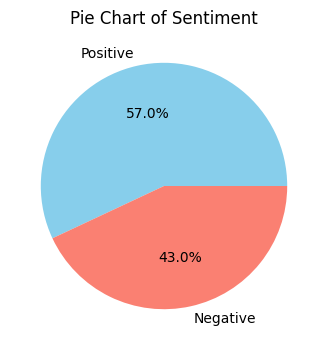

In [18]:
# Pie Chart for sentiment
plt.figure(figsize=(4, 4))
df_train['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Pie Chart of Sentiment')
plt.ylabel('')
plt.show()

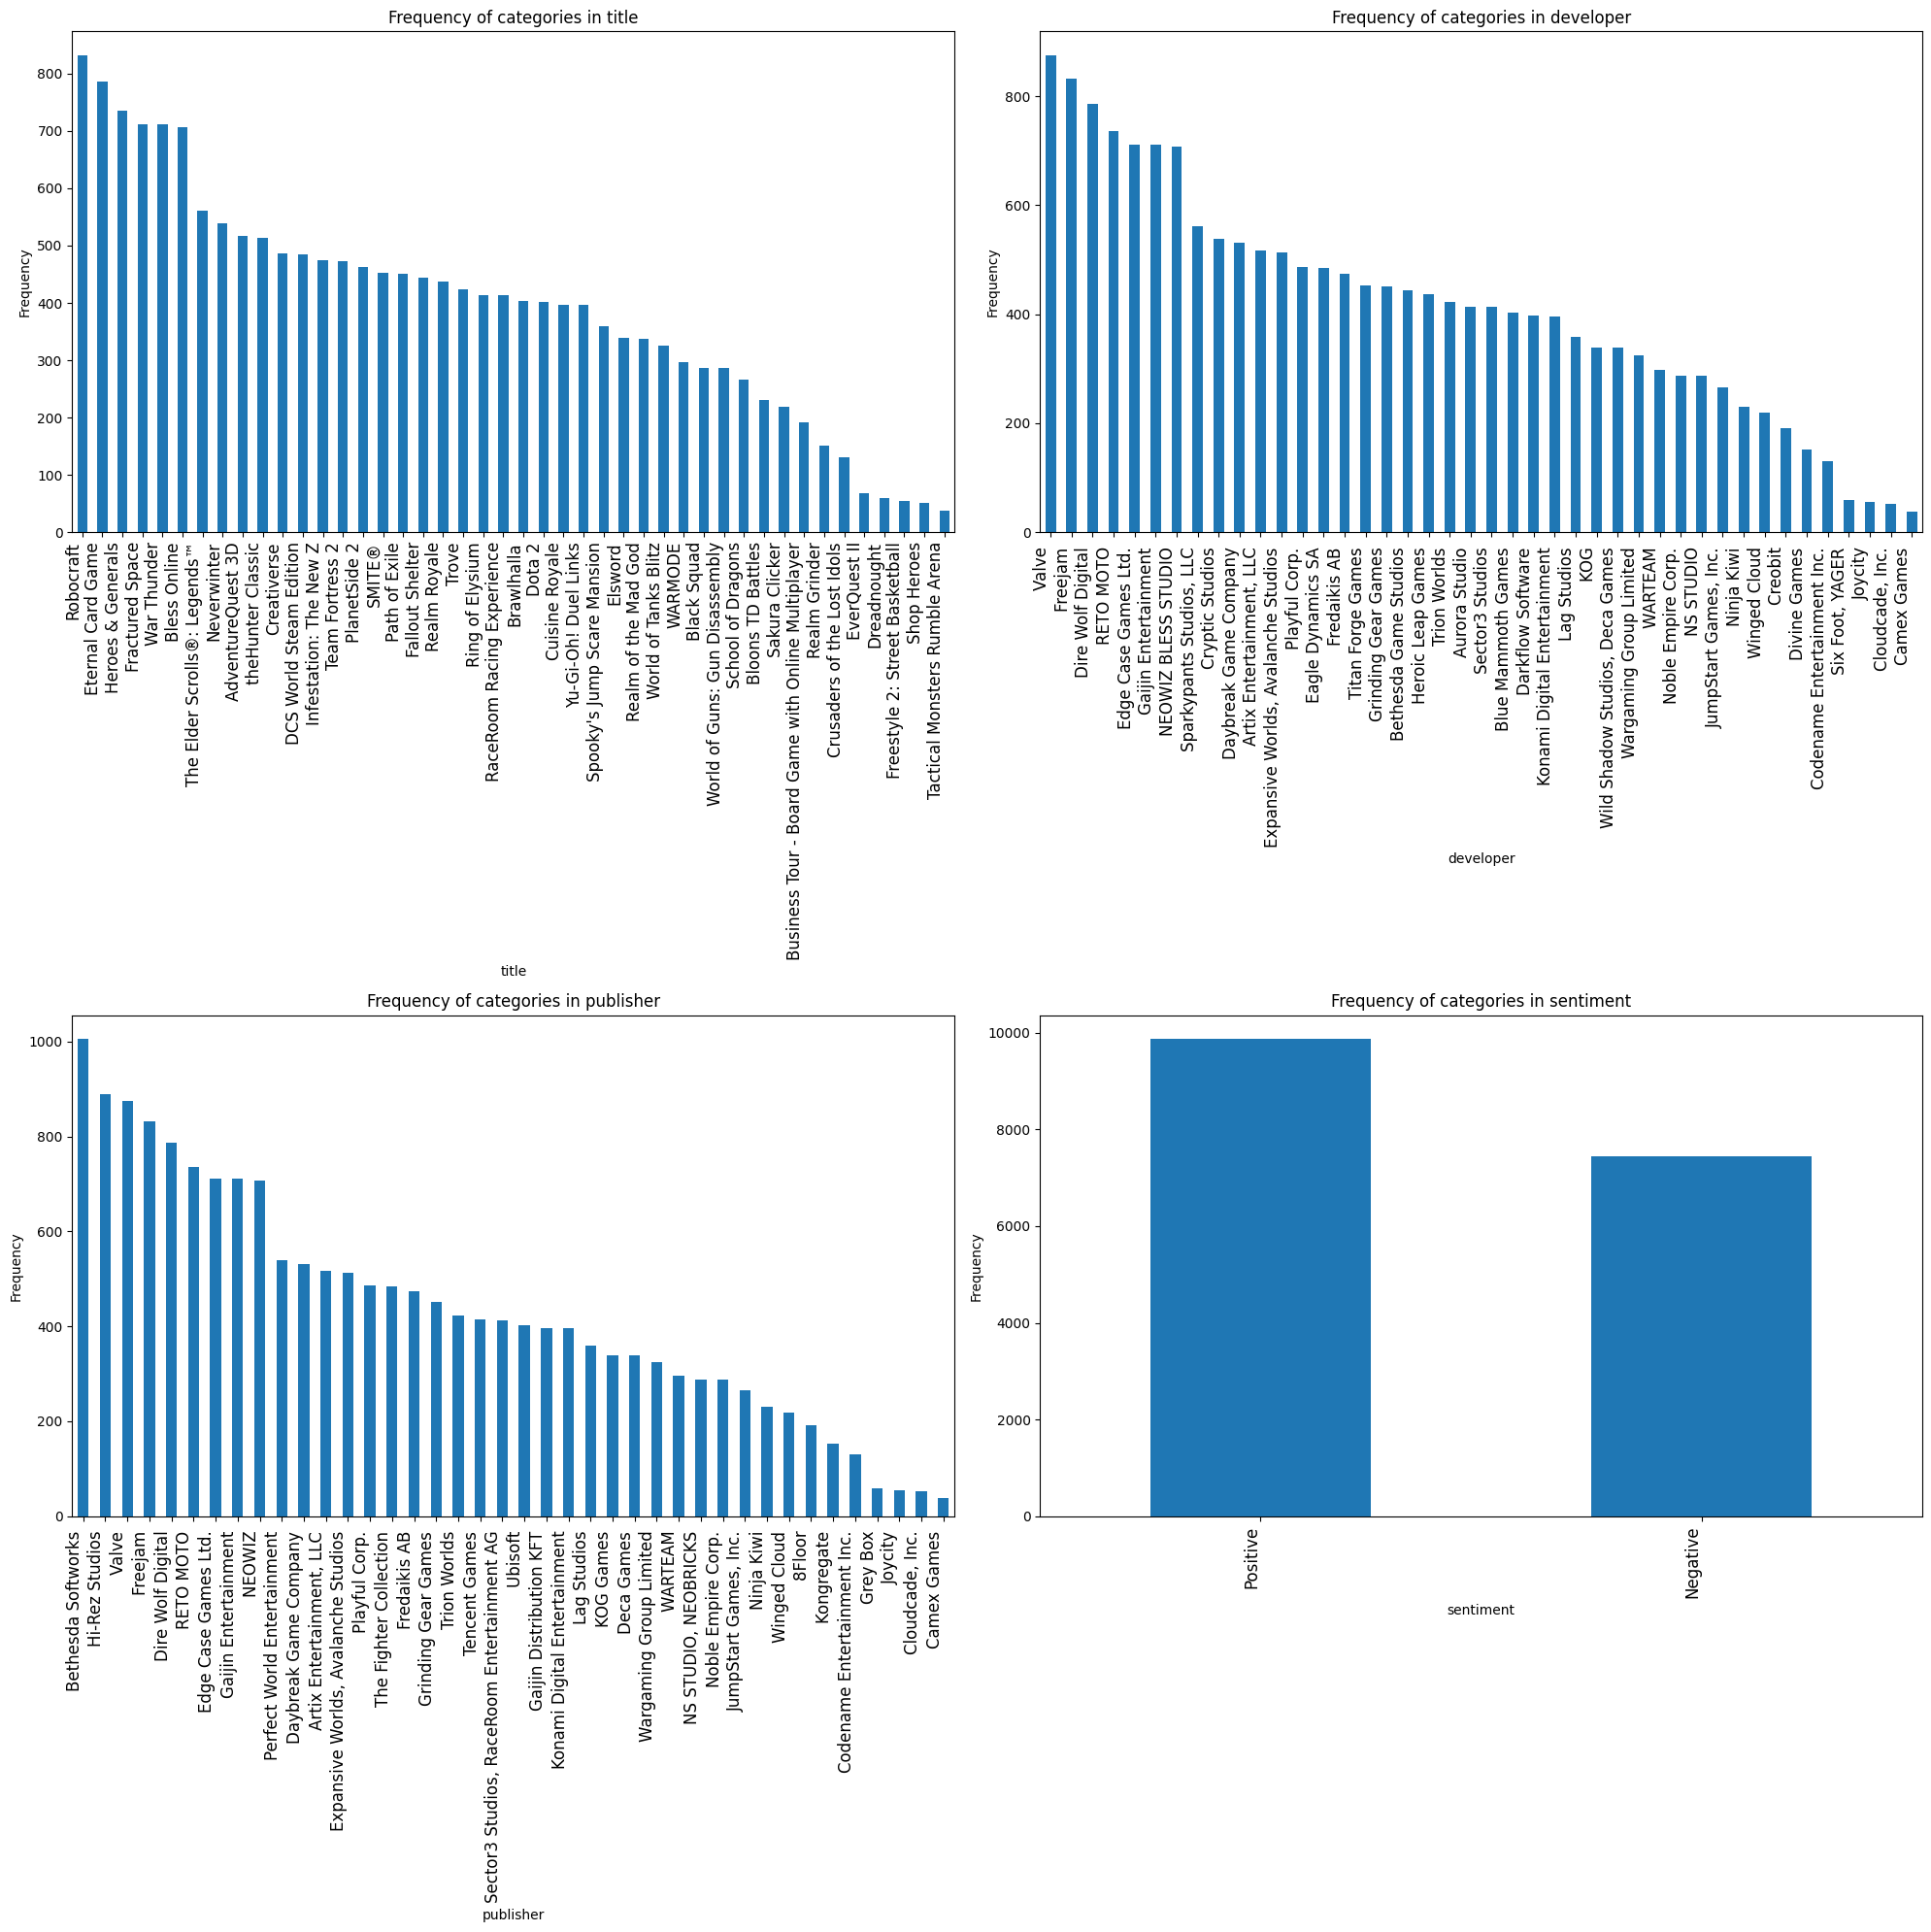

In [19]:
ignore_columns=['reviewID','user_review','overview','tags']
categorical_columns_ = [column for column in df_train.columns if df_train[column].dtype == 'object' and column not in ignore_columns]

plt.figure(figsize=(20, 20))

for i, column in enumerate(categorical_columns_):
    plt.subplot(2, 2, i + 1)
    category_counts = df_train[column].value_counts()
    category_counts.plot(kind='bar')
    plt.title(f'Frequency of categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


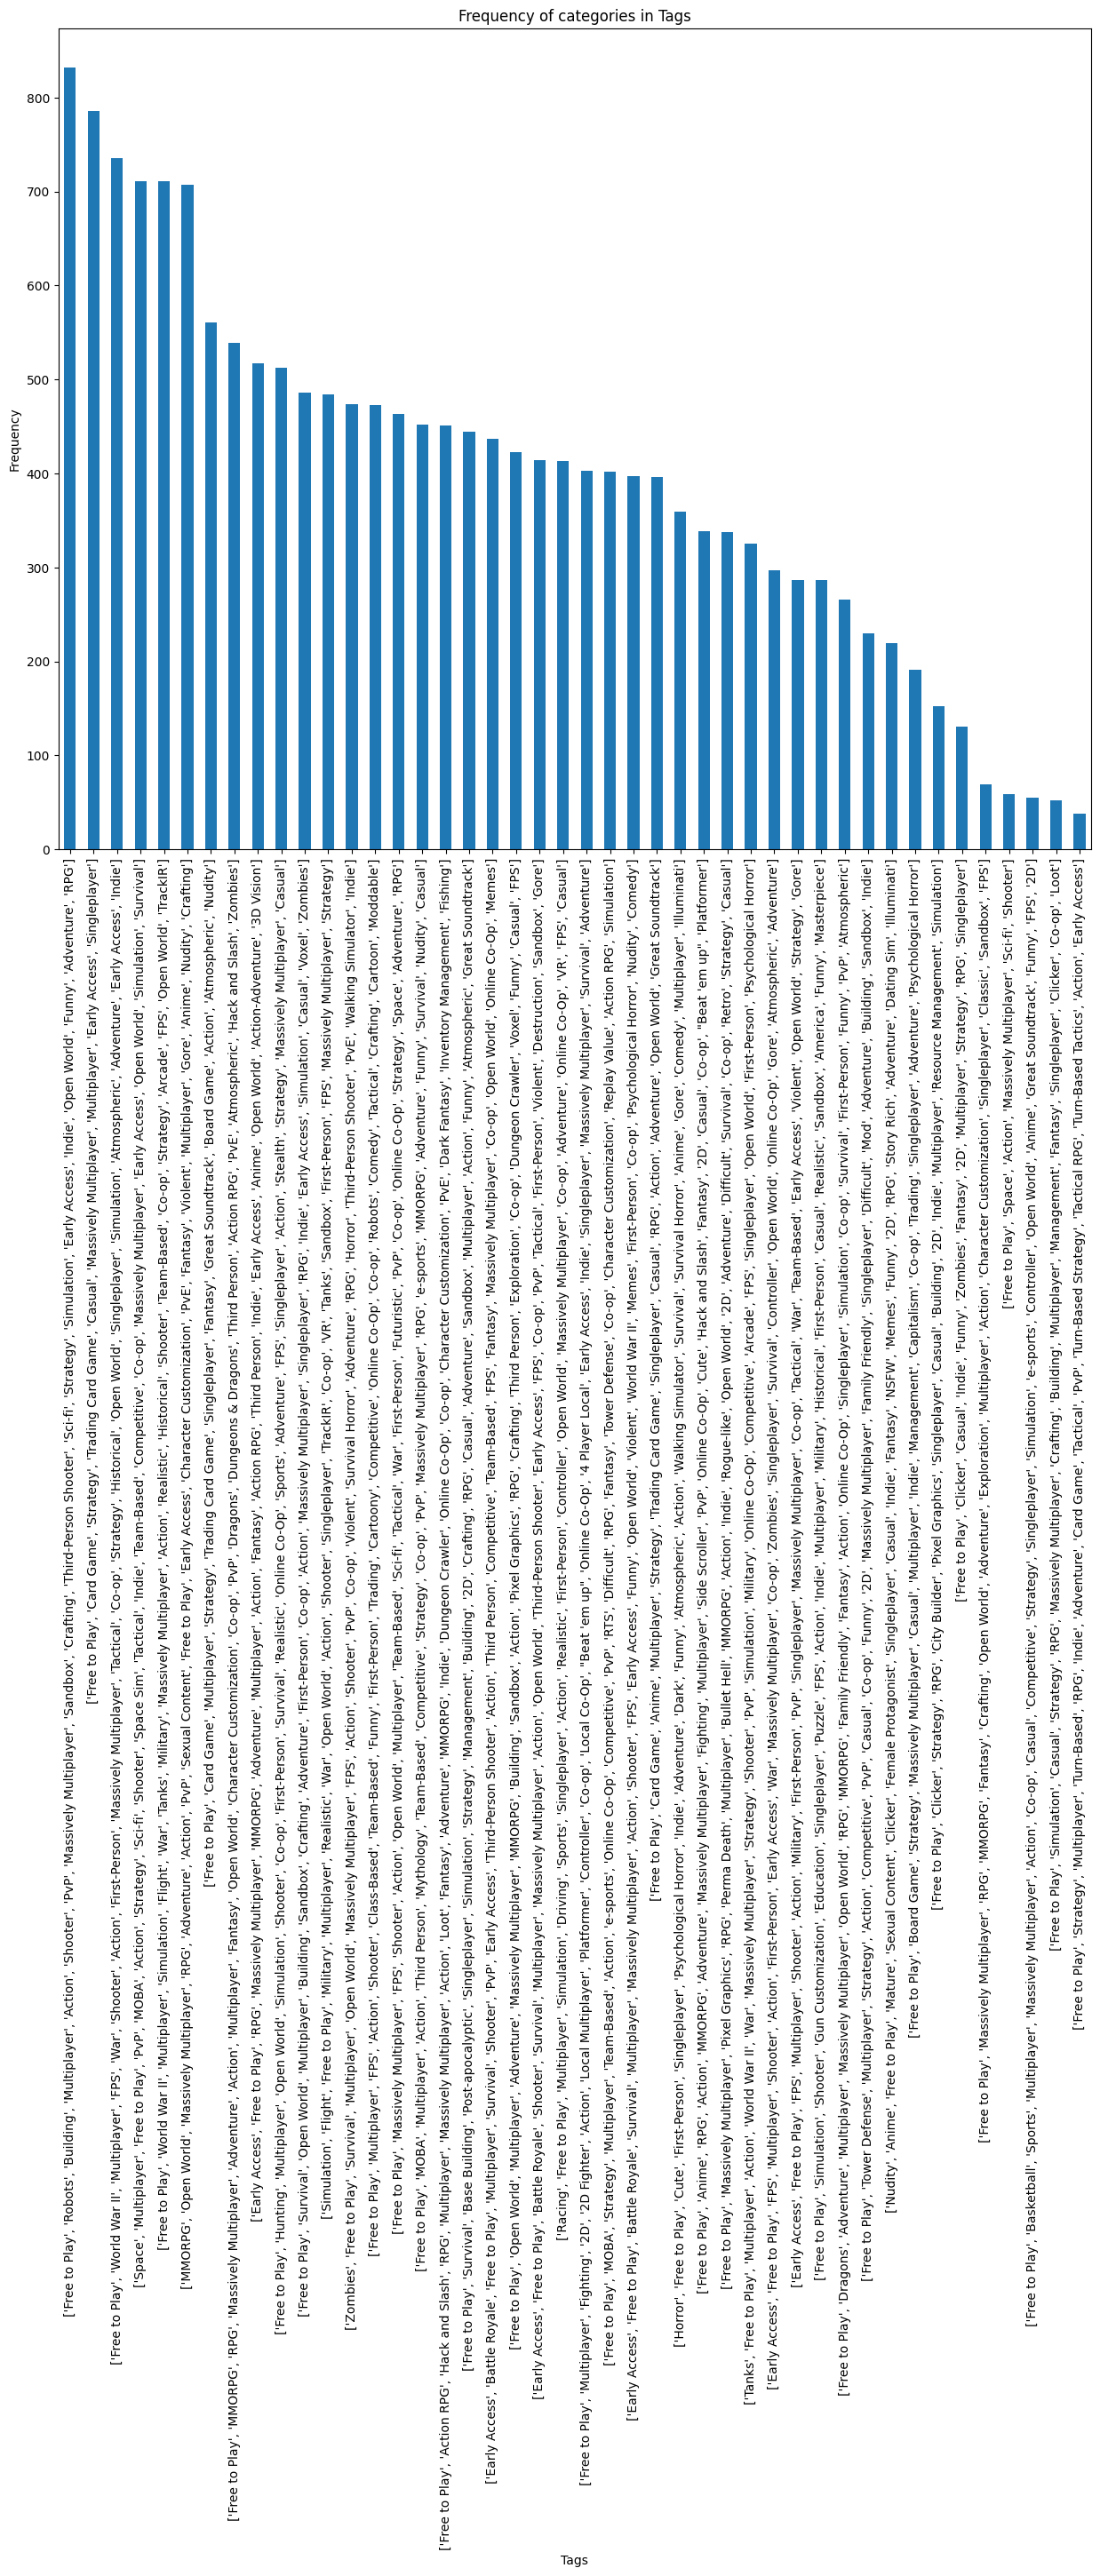

In [20]:
plt.figure(figsize=(15, 12))
tags_counts = df_train['tags'].value_counts()
tags_counts.plot(kind='bar')
plt.title(f'Frequency of categories in Tags')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

finding average length of text in each categorical column to find columns with lots of text

In [21]:
text_lengths = {}
text_length_threshold = 50
for column_name, column_data in df_train.items():
    if isinstance(column_data.iloc[0], str):
        text_lengths[column_name] = sum(len(text) for text in column_data) / len(column_data)
print("Average length of text for categorical columns:")
for col_name, avg_length in text_lengths.items():
    print(f"{col_name}: {avg_length:.2f} characters")
text_heavy_columns = [col_name for col_name, avg_length in text_lengths.items() if avg_length >= text_length_threshold]
print("\nColumns with a lot of text:", text_heavy_columns)

Average length of text for categorical columns:
title: 15.54 characters
developer: 17.31 characters
publisher: 17.23 characters
tags: 244.66 characters
overview: 1775.12 characters
user_review: 761.67 characters
sentiment: 8.00 characters

Columns with a lot of text: ['tags', 'overview', 'user_review']


Observations : <br>
1. The dataset consists of 17319 rows having 9 columns including 8 features and the label sentiment, out of which only 2 are continuous columns and the remaining are categorical.
2. There are 44 unique titles implying reviews are taken on 44 games
3. The feature year contains 178 null values
4. Attributes like tags, review and overview have a lot of text
5. The reviewID and year columns donot contain any outliers as shown in boxplots.
6. The columns title, developer and publisher has data right skewed.
7. Target 'sentiment' is biased.

Special treatment needed: <br>
1. As Null values are observed in year, null value handling is required.
2. And for some categorical features, encoding needs to be done.
3. For features like user_review, vectorization can be done
4. reviewID can be dropped as it is unique and is of no use for the model.
5. Identify for duplicate records in the dataset and eliminate them
6. Also for text data, stopwords removal, stemming can be applied

- Relationships among the features and label :

Count plots considering object type features with label

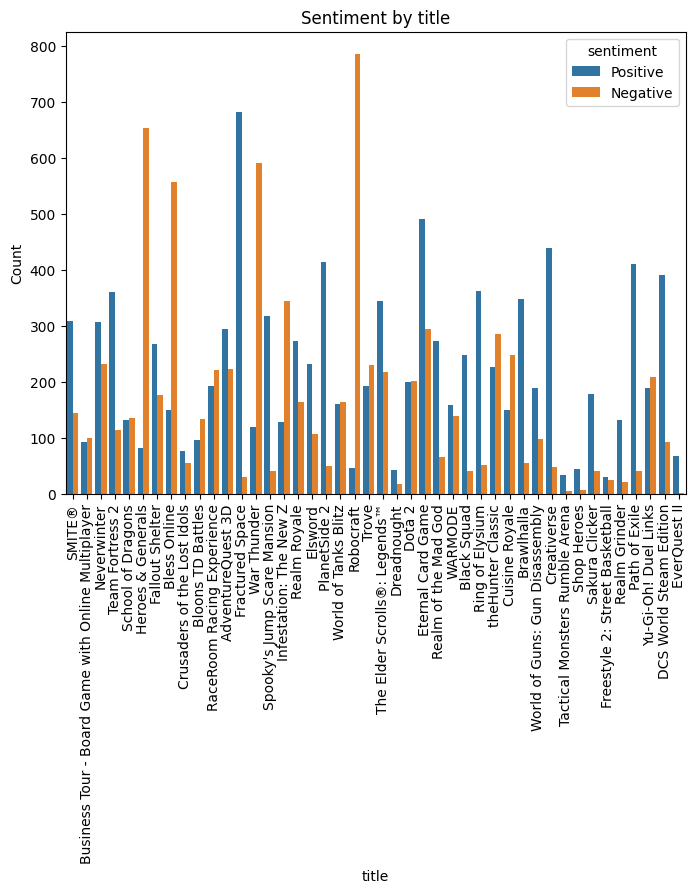

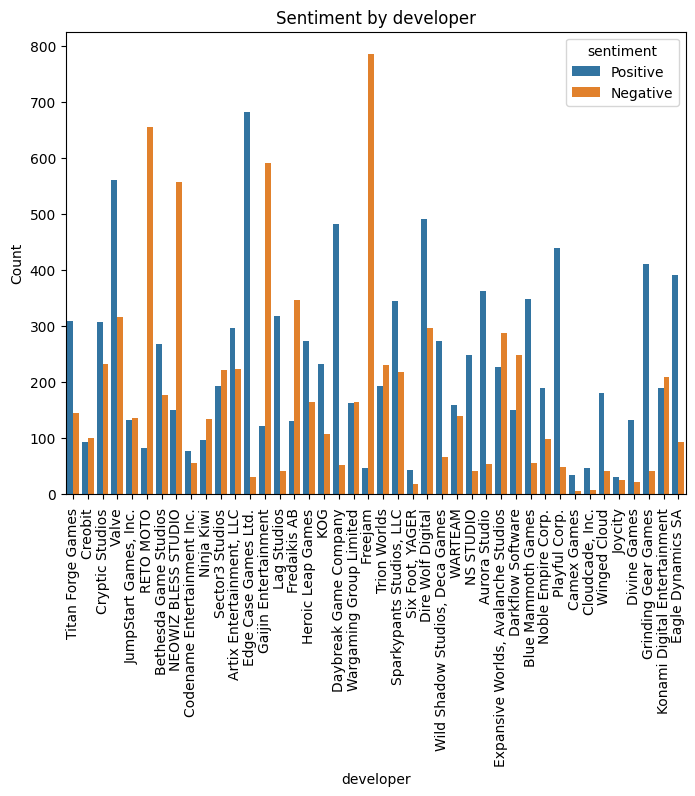

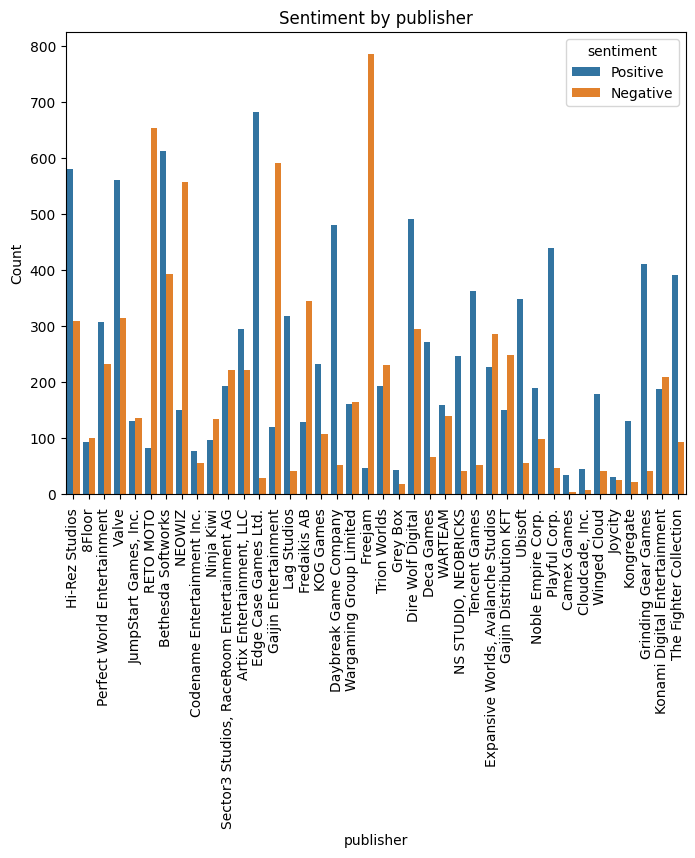

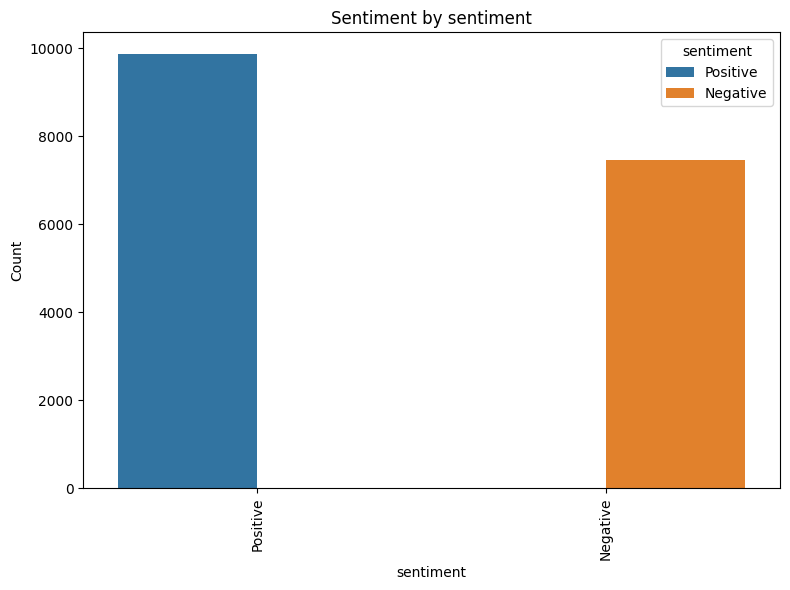

In [22]:
for i, column in enumerate(categorical_columns_):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df_train, x=column, hue='sentiment')
    plt.title(f'Sentiment by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Relationship between label and numerical column - year

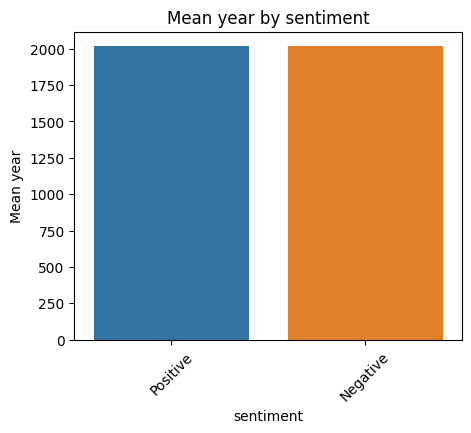

In [23]:
# Bar plot
plt.figure(figsize=(5, 4))
sns.barplot(data=df_train, x=df_train['sentiment'], y=df_train['year'], estimator=np.mean)
plt.title(f'Mean year by sentiment')
plt.xlabel('sentiment')
plt.ylabel(f'Mean year')
plt.xticks(rotation=45)
plt.show()

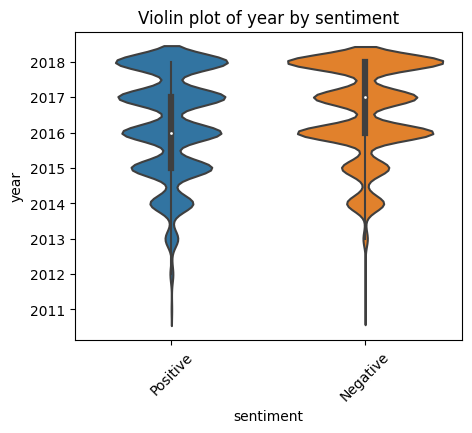

In [24]:
# Violin plot
plt.figure(figsize=(5, 4))
sns.violinplot(data=df_train, x=df_train['sentiment'], y=df_train['year'])
plt.title(f'Violin plot of year by sentiment')
plt.xlabel('sentiment')
plt.ylabel('year')
plt.xticks(rotation=45)
plt.show()

Boxplots for categorical variables vs numerical variables

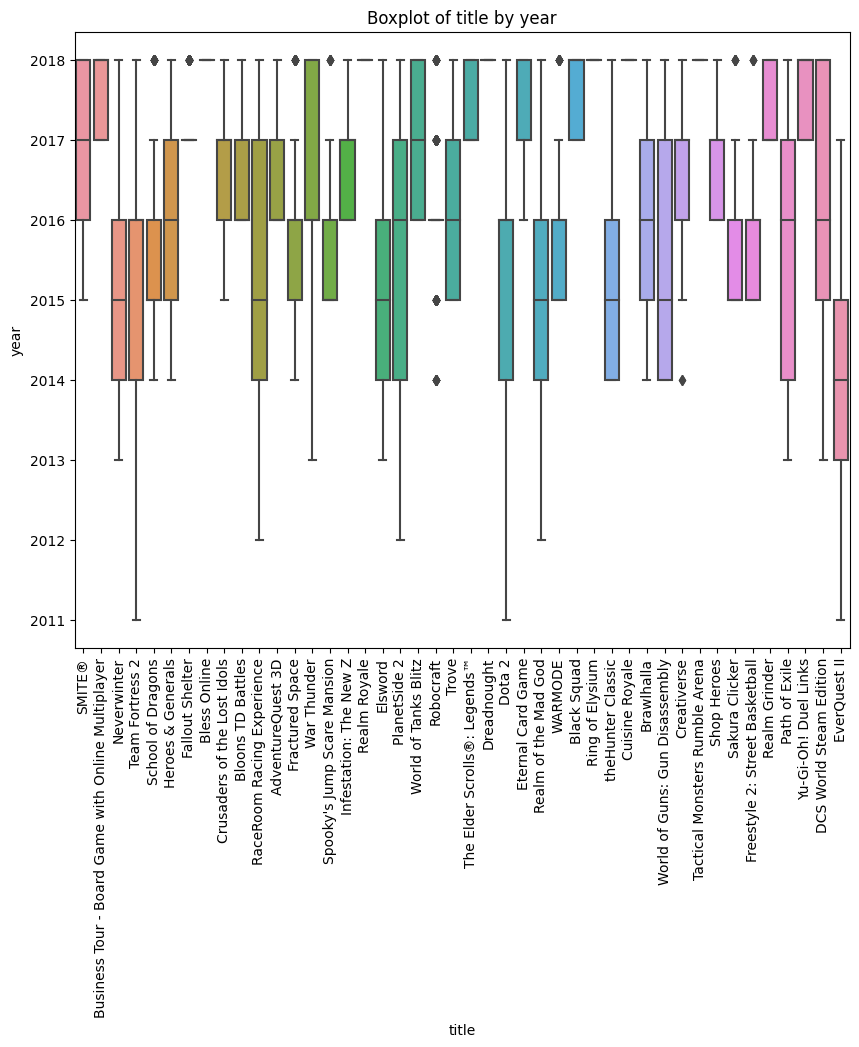

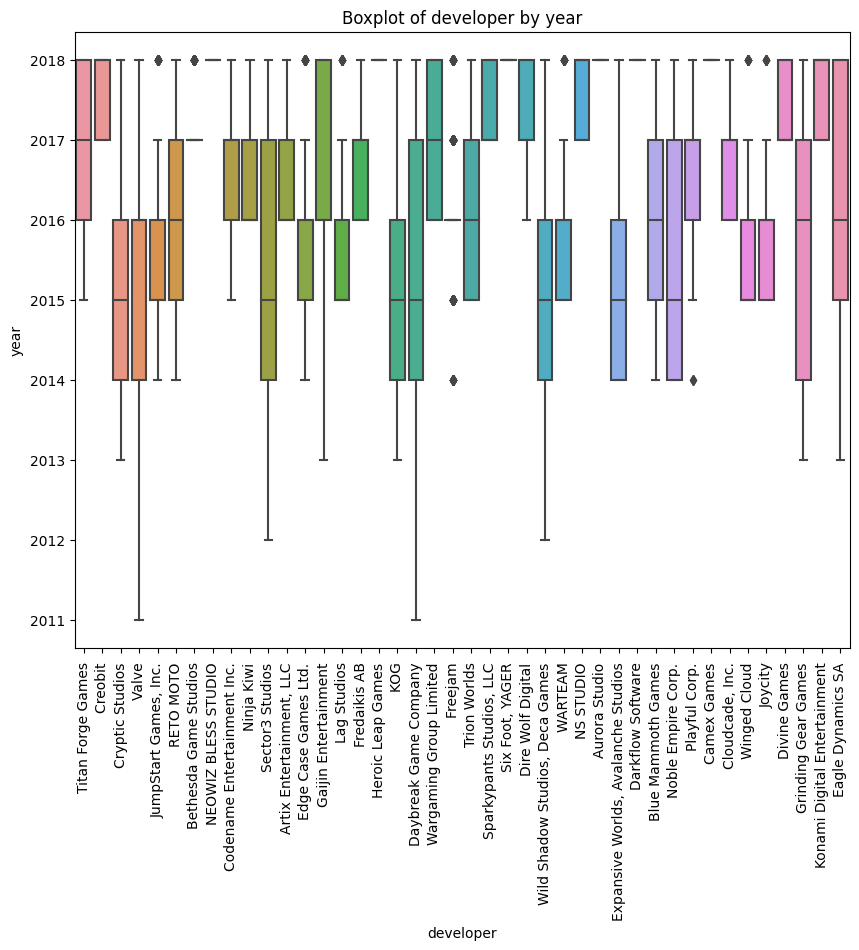

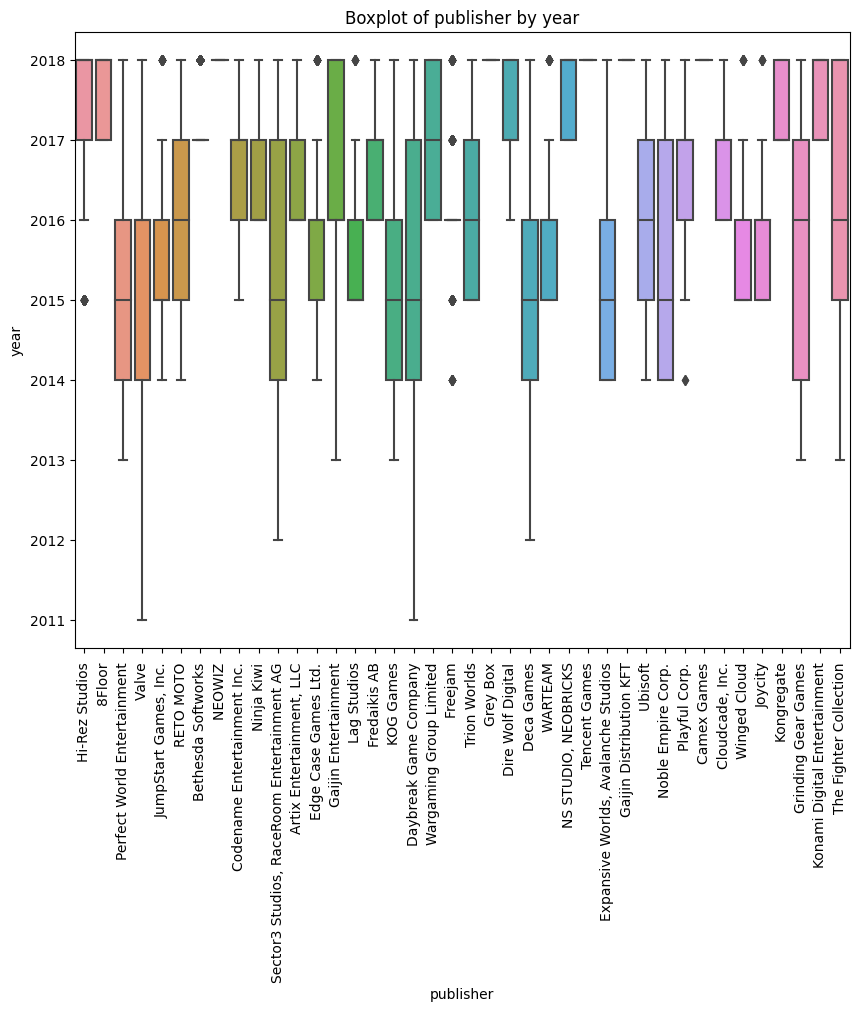

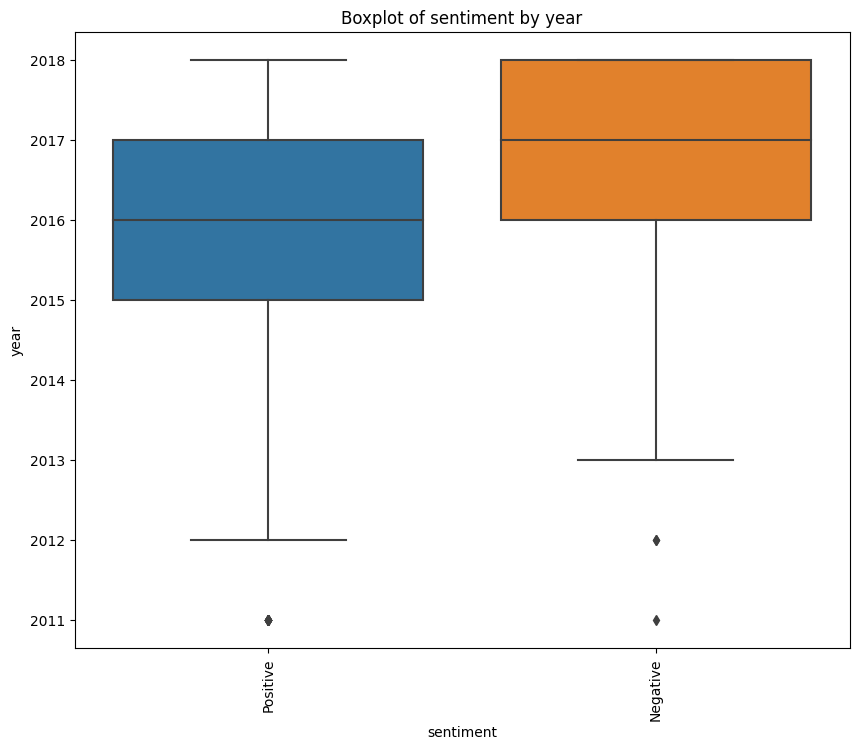

In [25]:
for cat_col in categorical_columns_:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=cat_col, y=df_train['year'], data=df_train)
    plt.title(f"Boxplot of {cat_col} by year")
    plt.xlabel(cat_col)
    plt.ylabel('year')
    plt.xticks(rotation=90)
    plt.show()

percentage of each feature with label

In [26]:
sentiment_grouped = df_train.groupby('sentiment')
for feature in df_train.columns[:-1]:  # Exclude the sentiment label column
    print(f"Percentage of {feature} for each sentiment group:")
    print("-" * 30)
    for sentiment_value, group_data in sentiment_grouped:
        percentages = group_data[feature].value_counts(normalize=True).mul(100)
        print(f"Sentiment: {sentiment_value}")
        print(percentages)
        print("\n")

Percentage of review_id for each sentiment group:
------------------------------
Sentiment: Negative
review_id
6648     0.013421
12776    0.013421
2814     0.013421
12786    0.013421
14833    0.013421
           ...   
11000    0.013421
14033    0.013421
7675     0.013421
14335    0.013421
11731    0.013421
Name: proportion, Length: 7451, dtype: float64


Sentiment: Positive
review_id
4848     0.010134
8243     0.010134
4096     0.010134
9660     0.010134
9592     0.010134
           ...   
15984    0.010134
9508     0.010134
17483    0.010134
16161    0.010134
5275     0.010134
Name: proportion, Length: 9868, dtype: float64


Percentage of title for each sentiment group:
------------------------------
Sentiment: Negative
title
Robocraft                                             10.548920
Heroes & Generals                                      8.777345
War Thunder                                            7.931821
Bless Online                                           7.475507
Infest

- Object Feature vs Object Feature and Object Feature vs Label(object type)

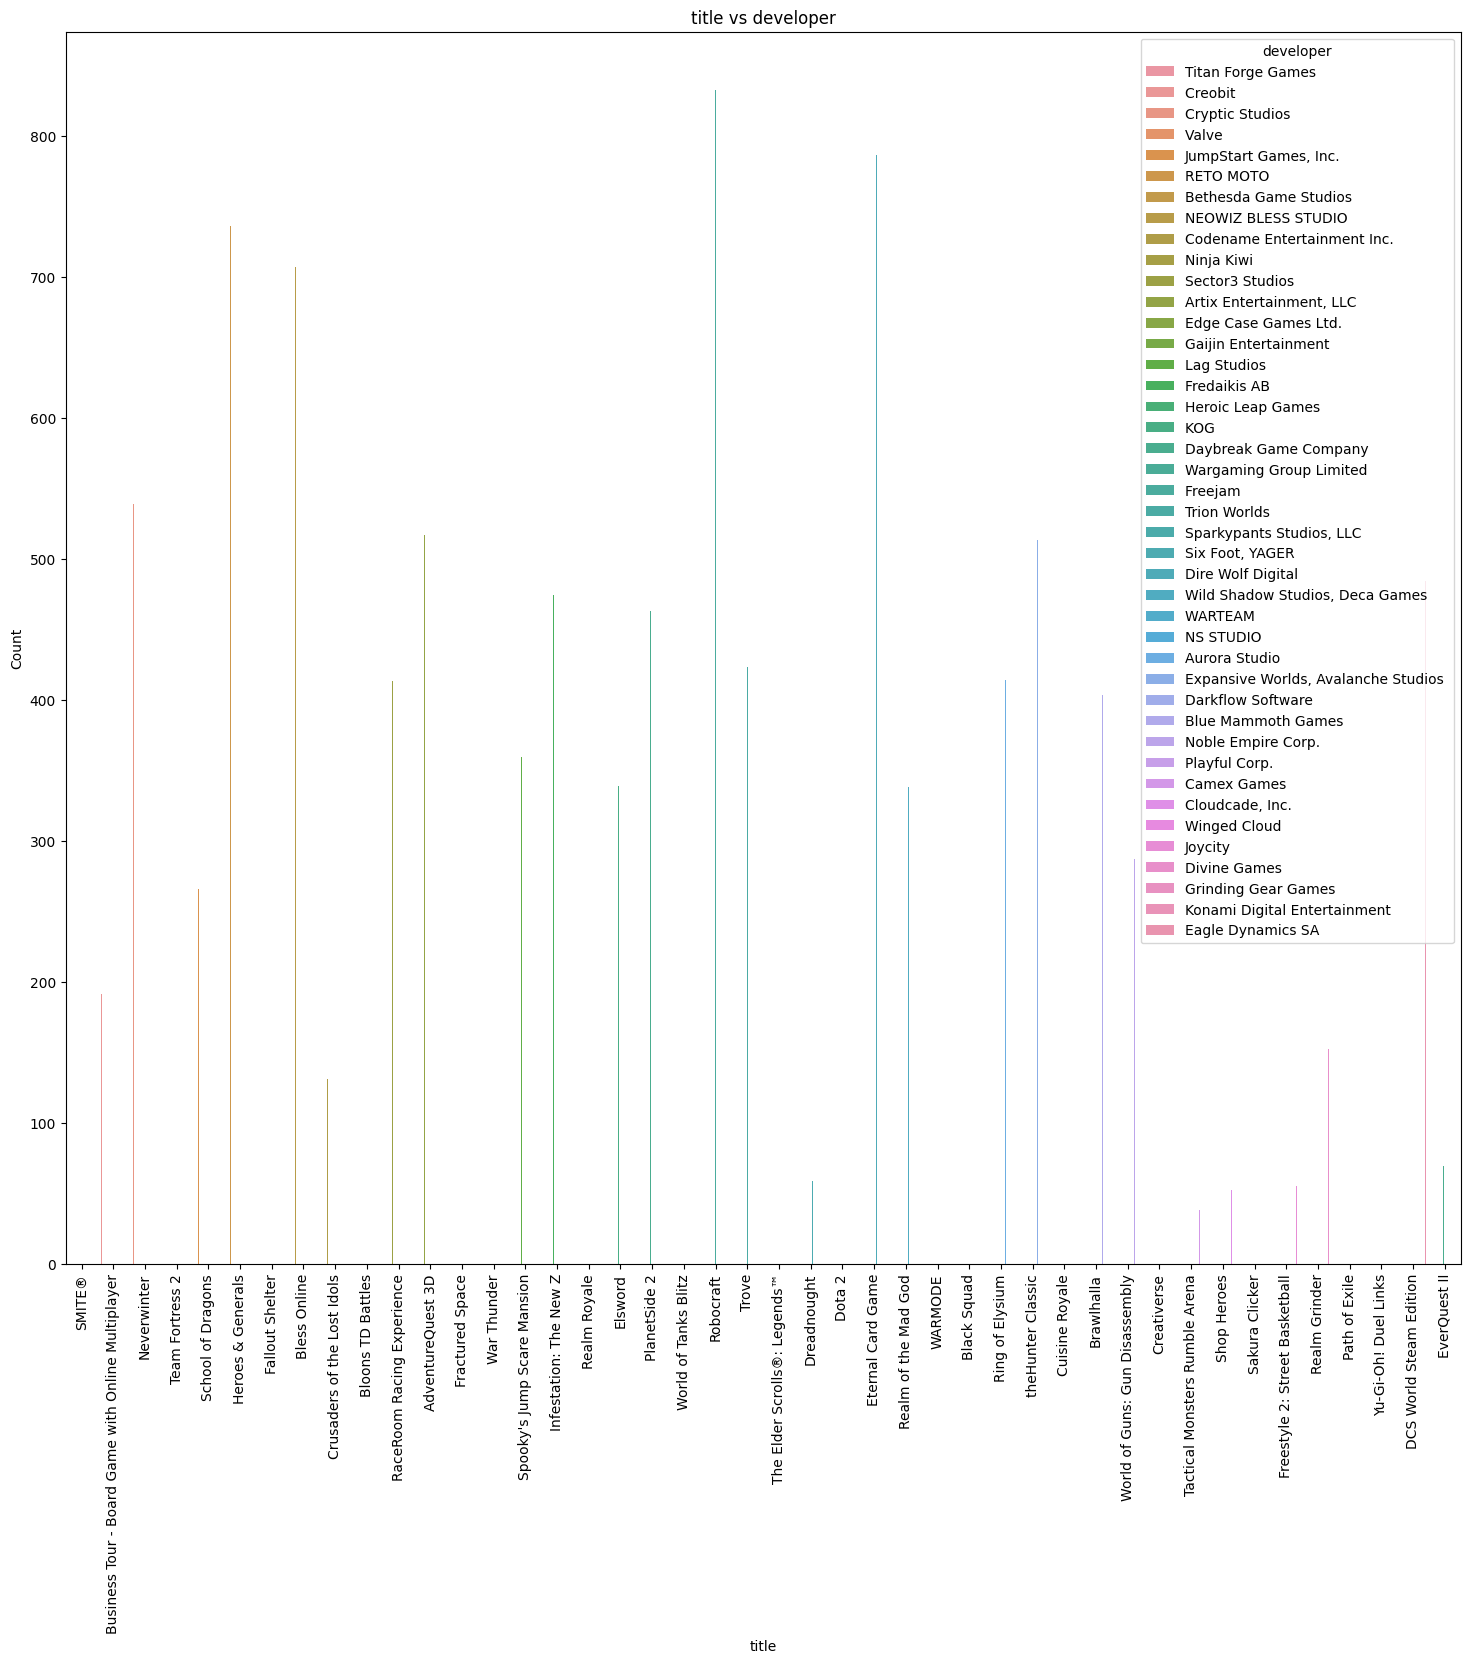

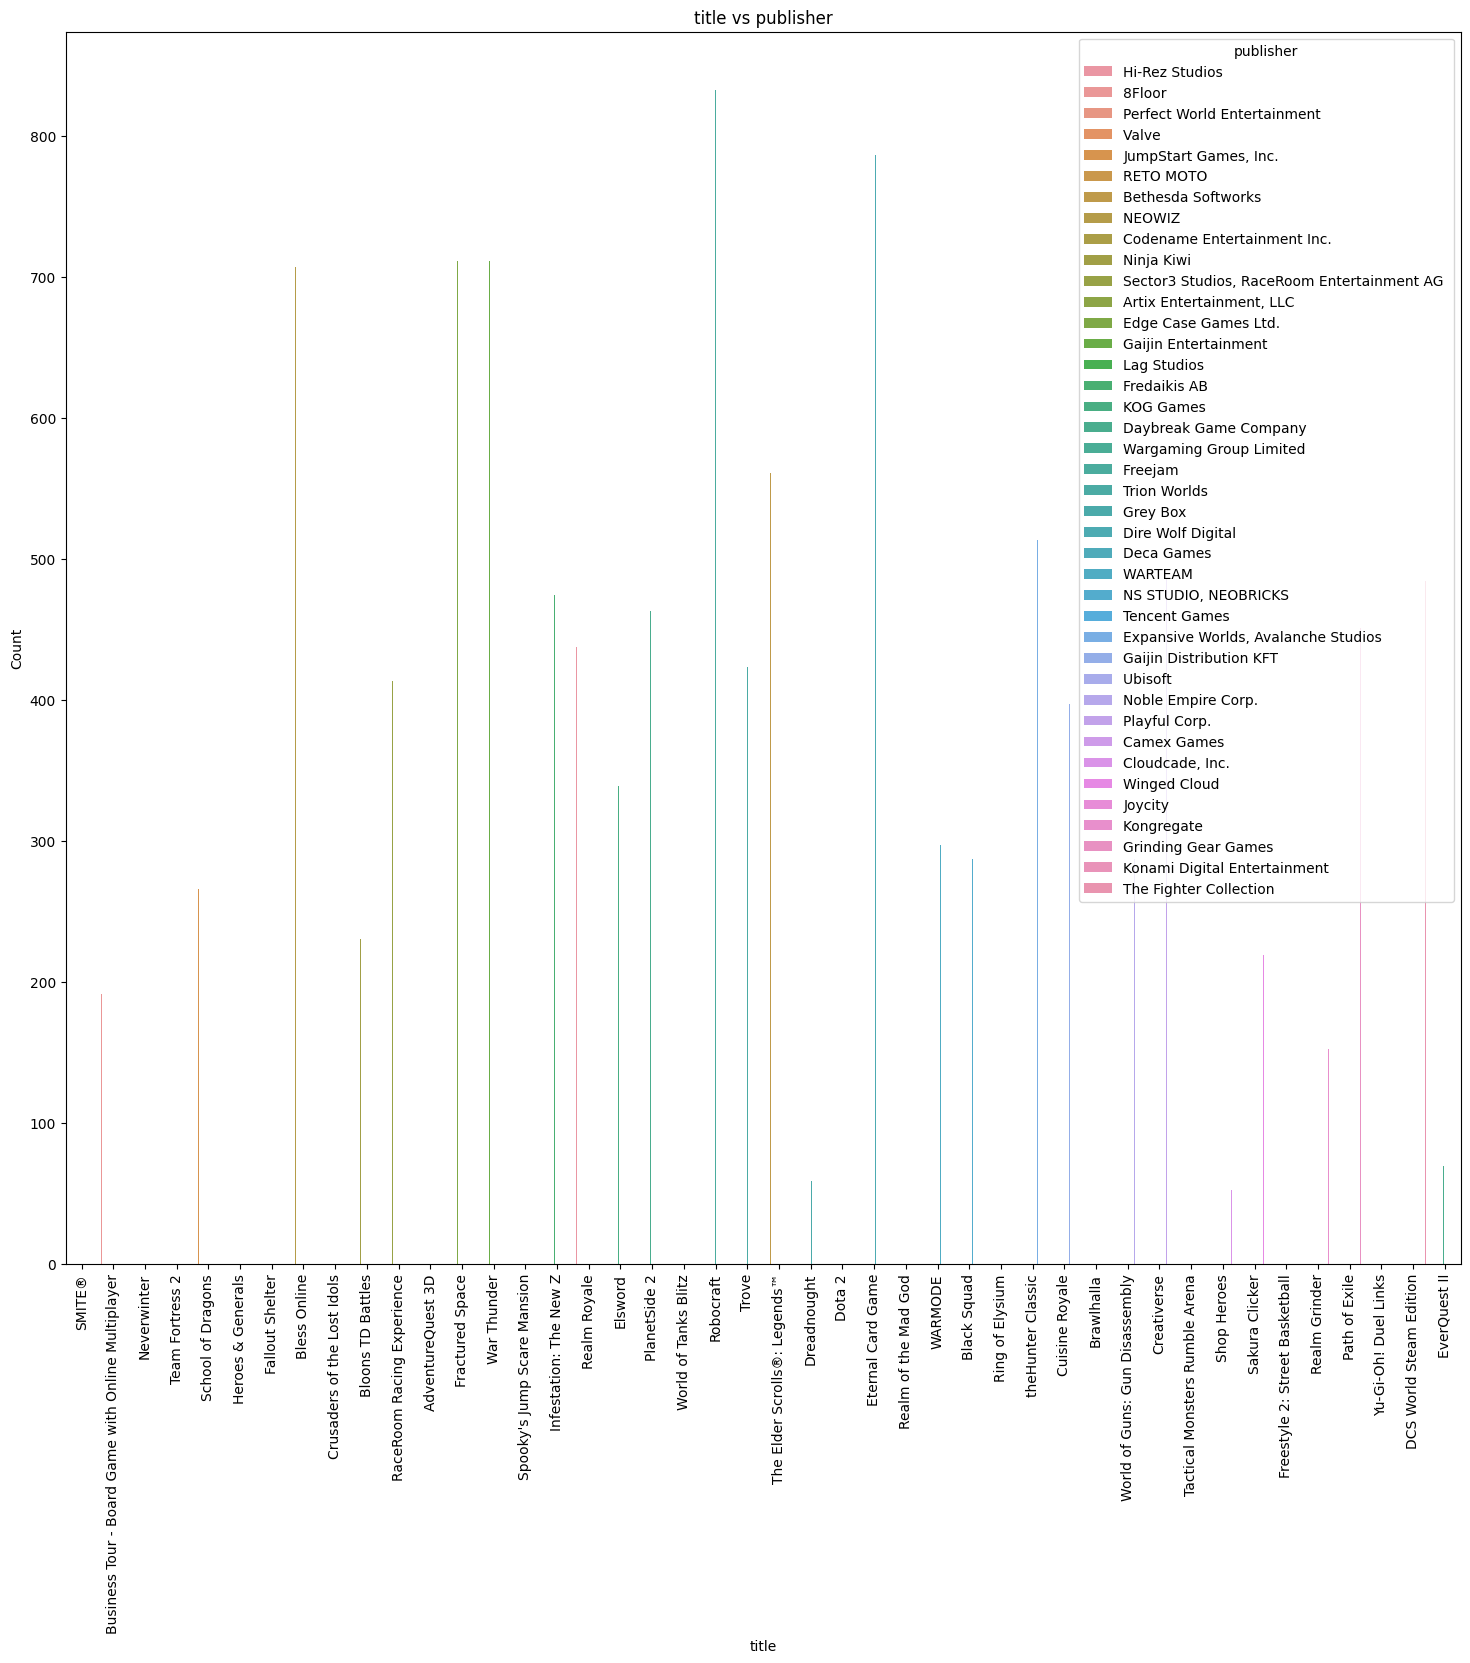

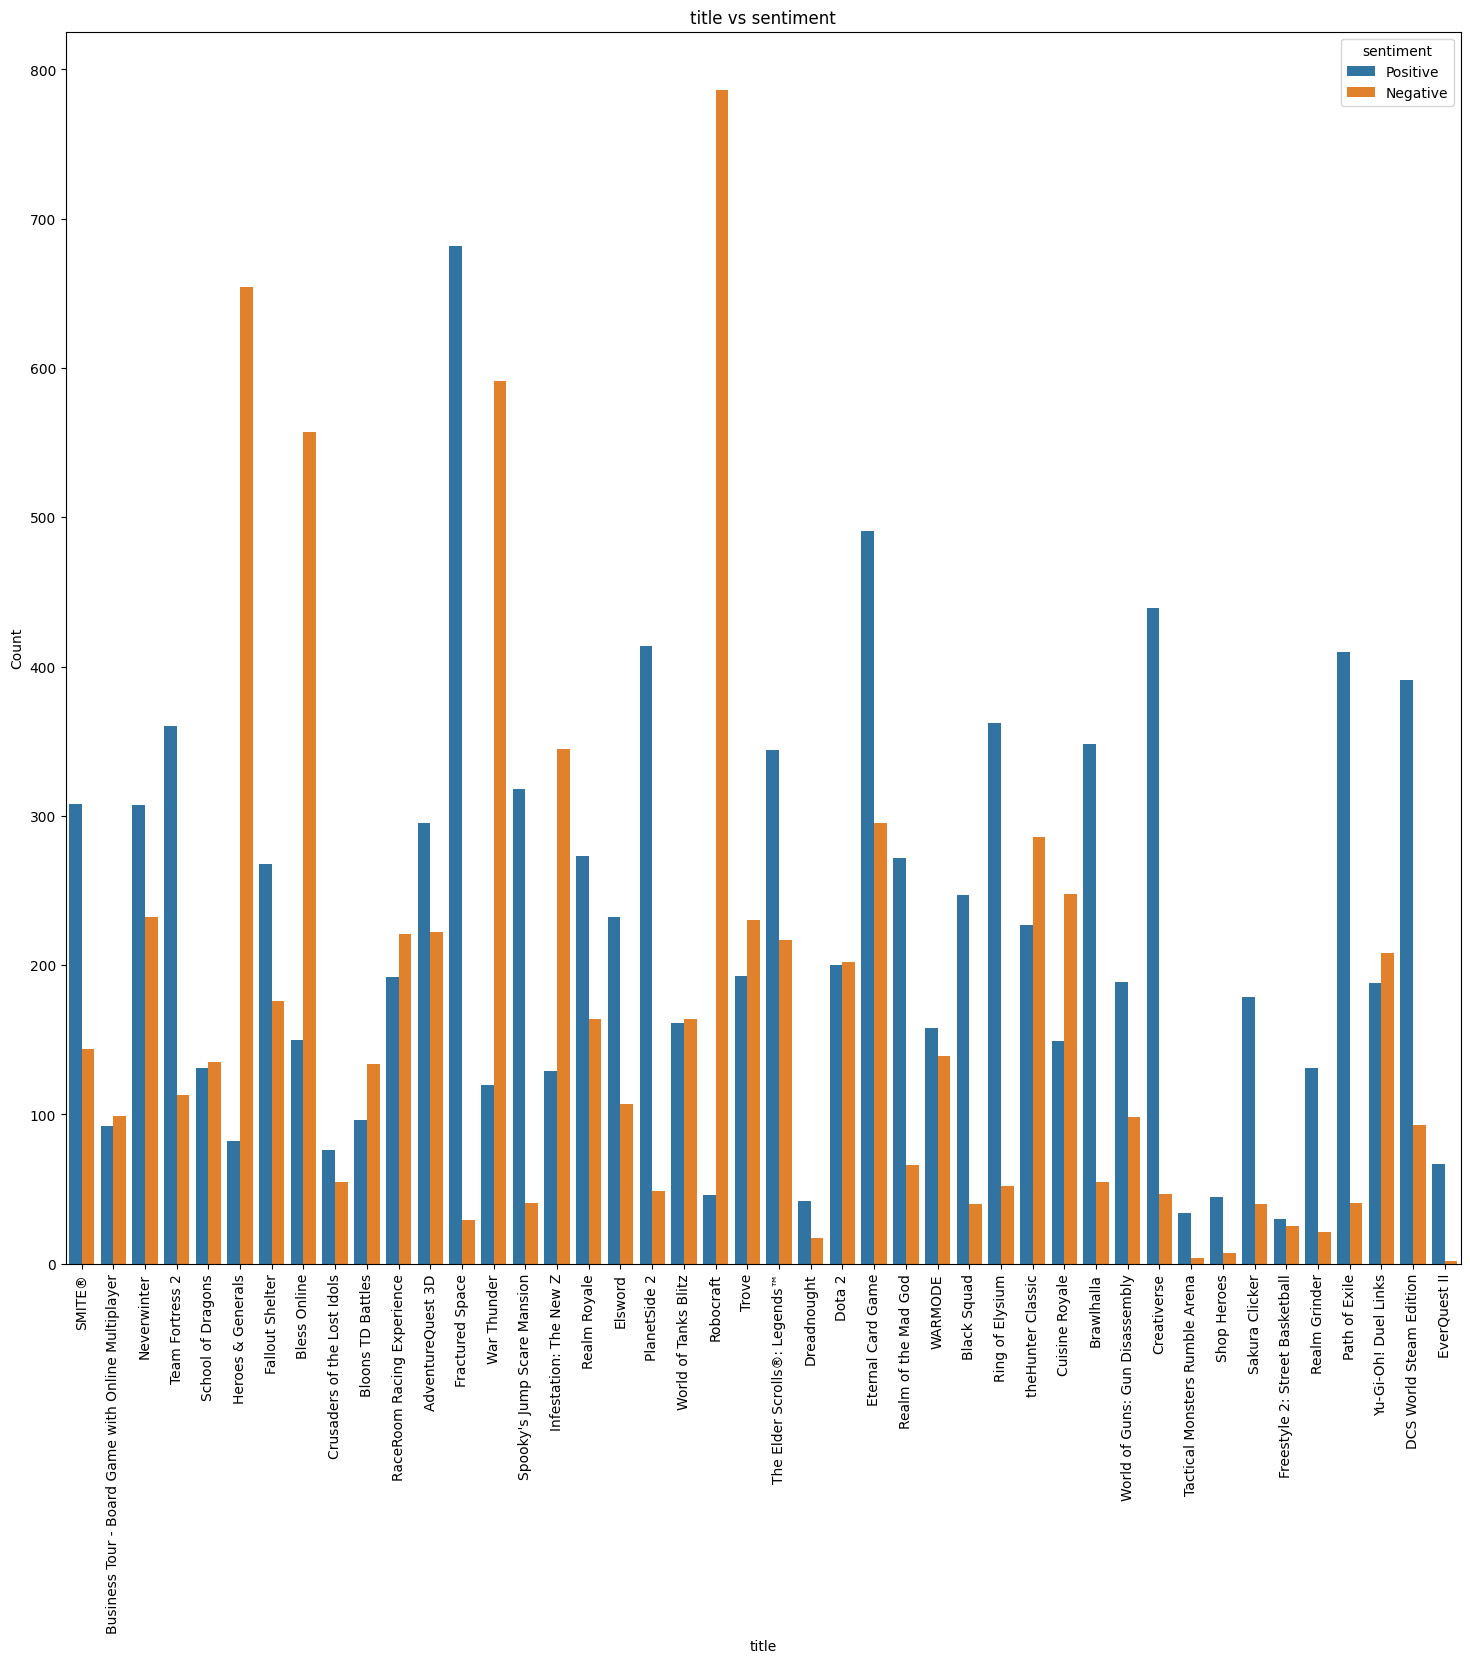

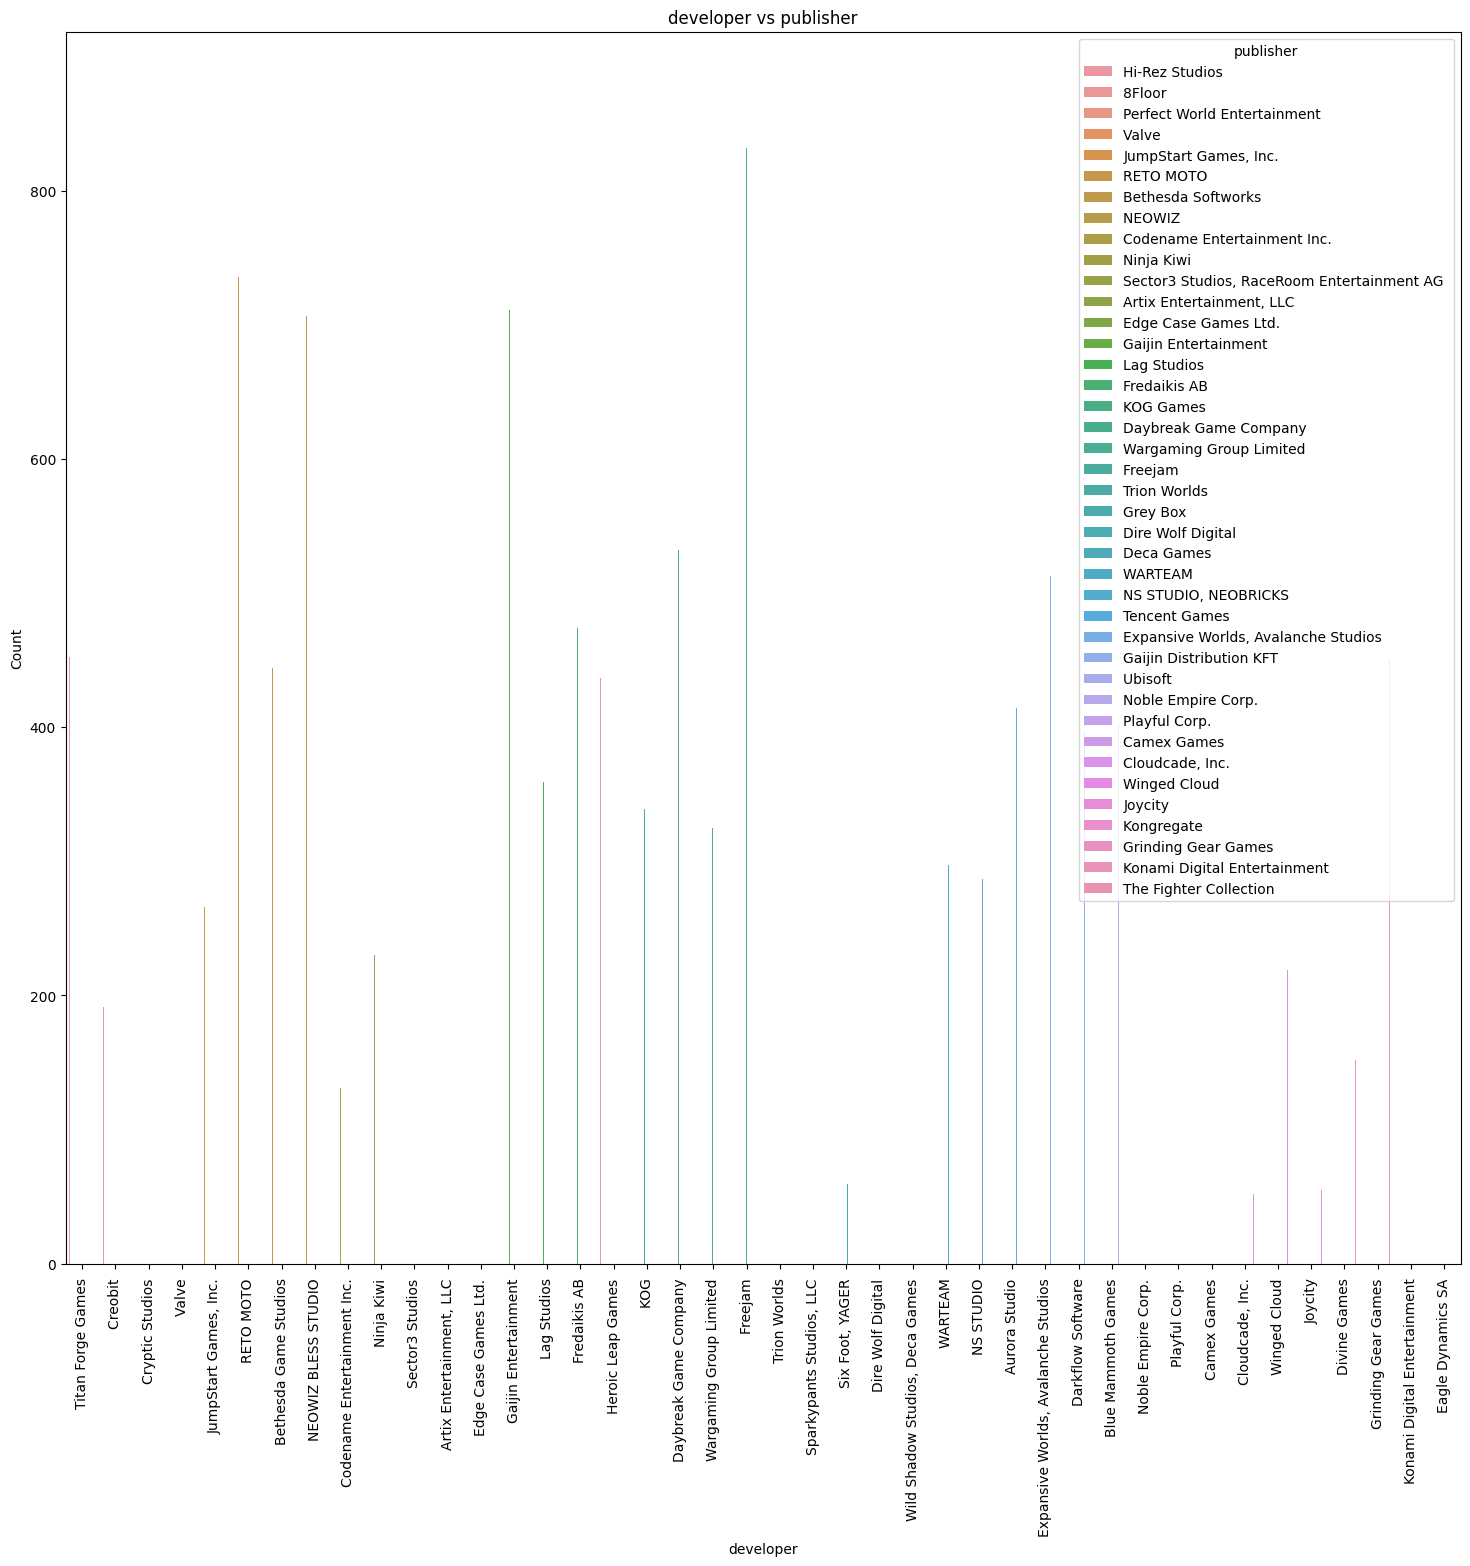

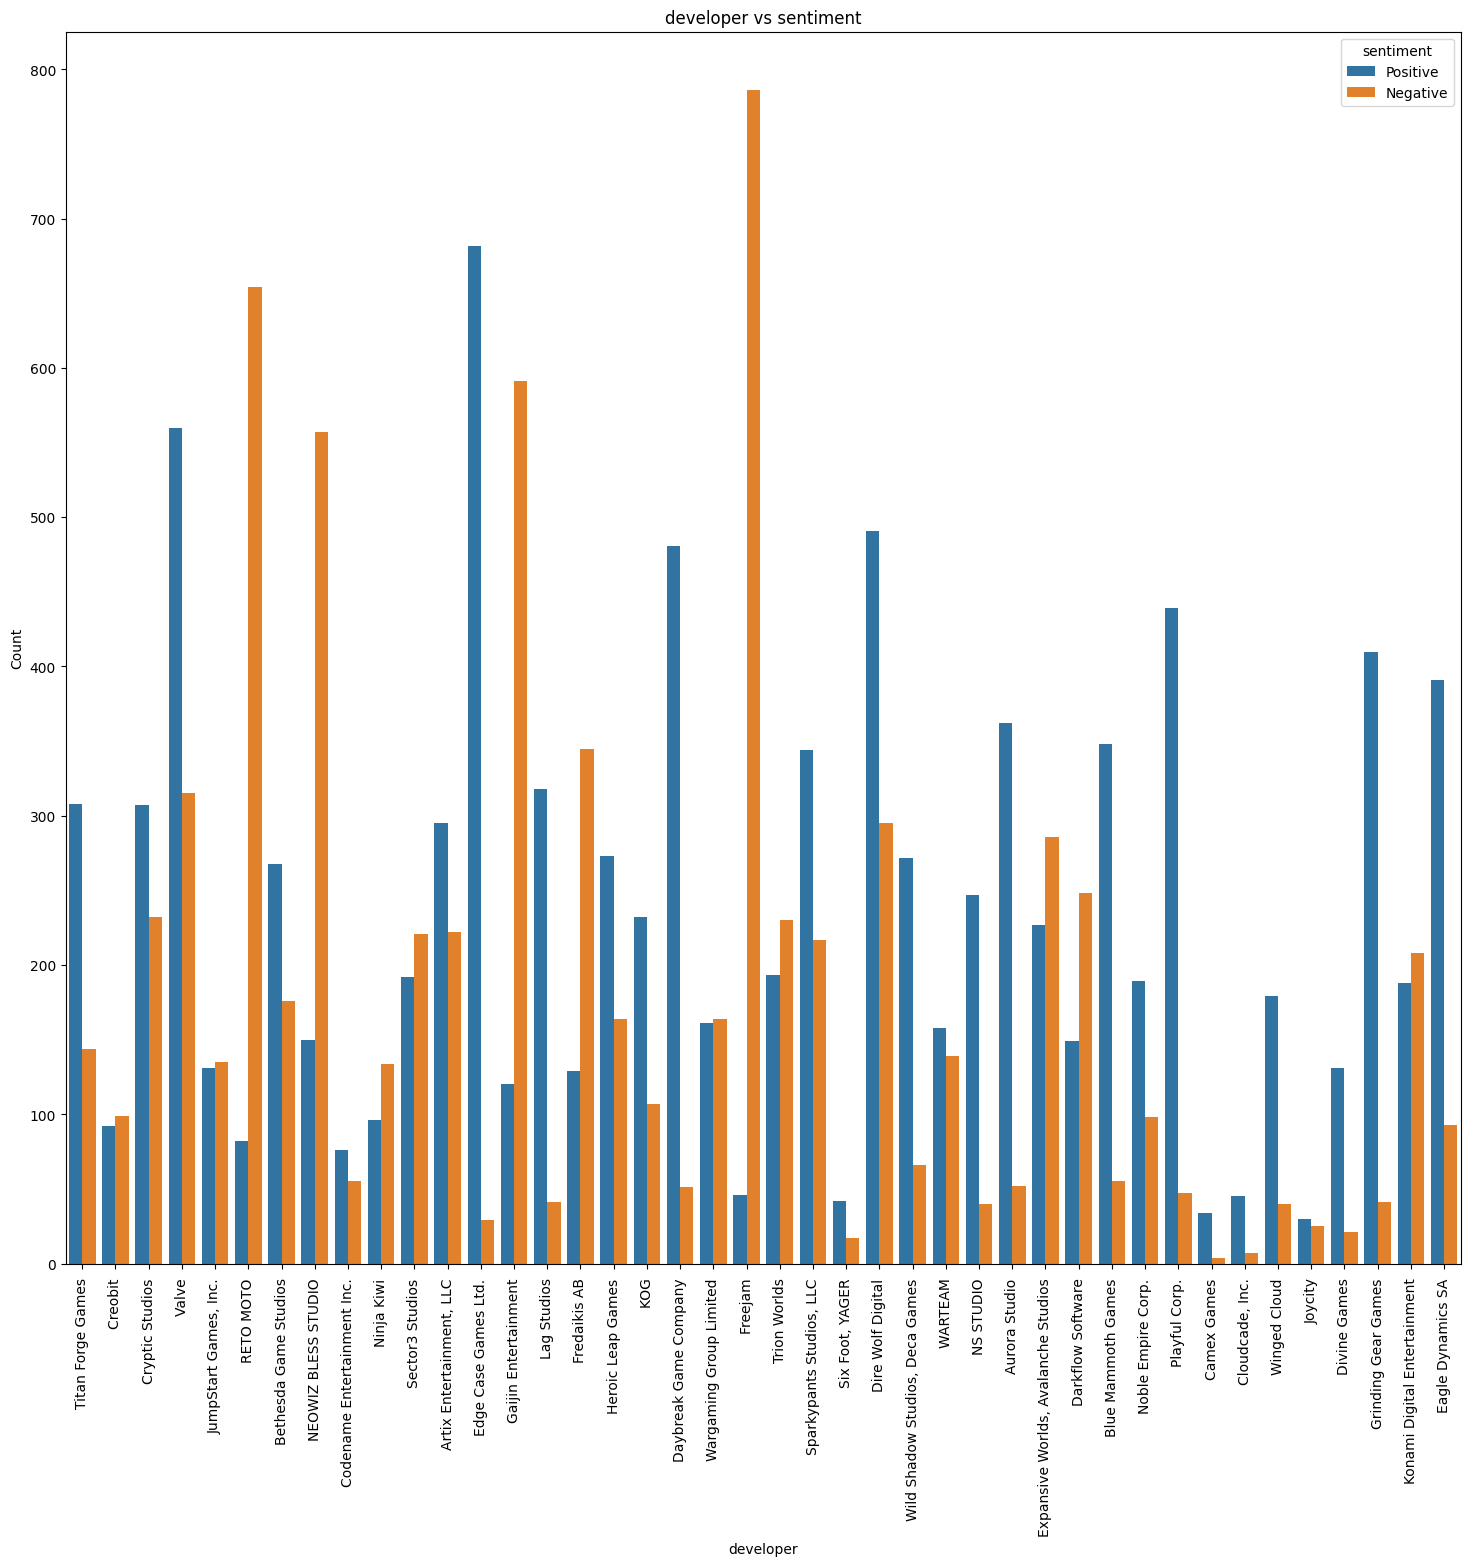

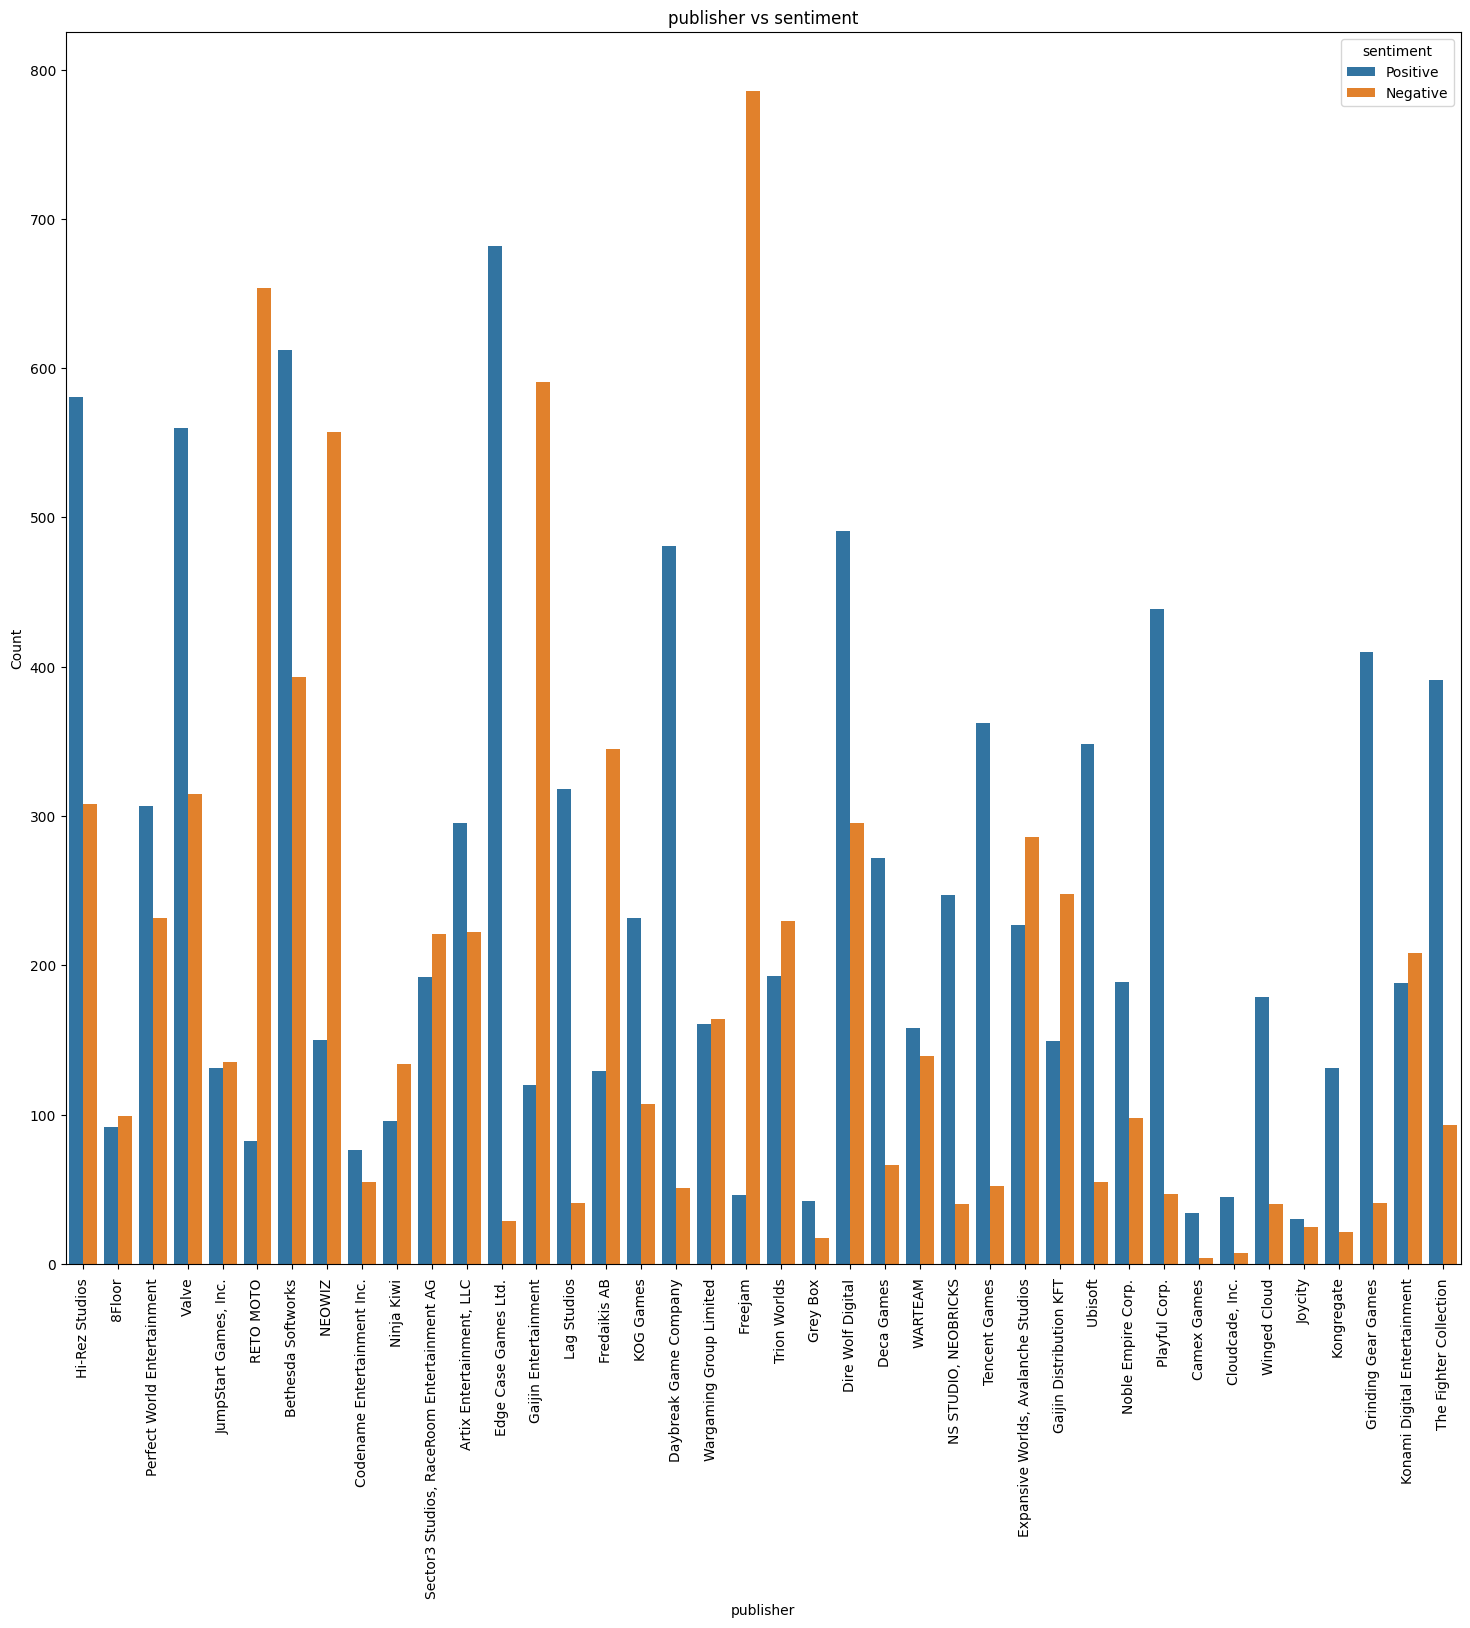

In [27]:
for i in range(len(categorical_columns_)):
    for j in range(i + 1, len(categorical_columns_)):
        plt.figure(figsize=(18, 16))
        sns.countplot(x=categorical_columns_[i], hue=categorical_columns_[j], data=df_train)
        plt.title(f'{categorical_columns_[i]} vs {categorical_columns_[j]}')
        plt.xlabel(categorical_columns_[i])
        plt.ylabel('Count')
        plt.legend(title=categorical_columns_[j])
        plt.xticks(rotation=90)
        plt.show()

In [28]:
# Calculating count of text-heavy attributes - overview and review
text_counts = {}
for column in categorical_columns_:
    count = df_train[column].count()
    text_counts[column] = count

# Printing the counts of text-heavy attributes
print("Counts of text-heavy attributes:")
for column, count in text_counts.items():
    print(f"{column}: {count}")

Counts of text-heavy attributes:
title: 17319
developer: 17319
publisher: 17319
sentiment: 17319


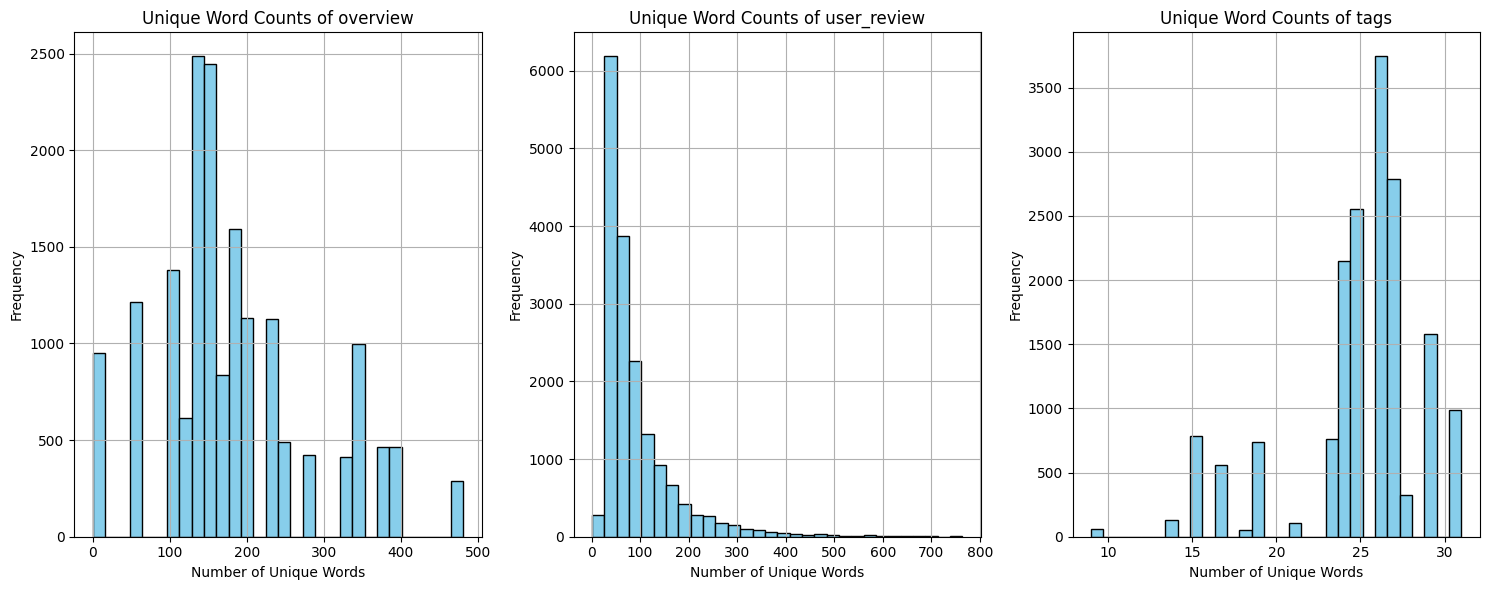

In [30]:
#unique word counts in overview, review and tags
import matplotlib.pyplot as plt
feature_names = ['overview', 'user_review', 'tags']
plt.figure(figsize=(15, 6))
for i, feature_name in enumerate(feature_names, 1):
    unique_word_counts = df_train[feature_name].str.split().apply(lambda x: len(set(x)))
    plt.subplot(1, 3, i)
    plt.hist(unique_word_counts, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Unique Word Counts of {feature_name}")
    plt.xlabel("Number of Unique Words")
    plt.ylabel("Frequency")
    plt.grid(True)
plt.tight_layout()
plt.show()

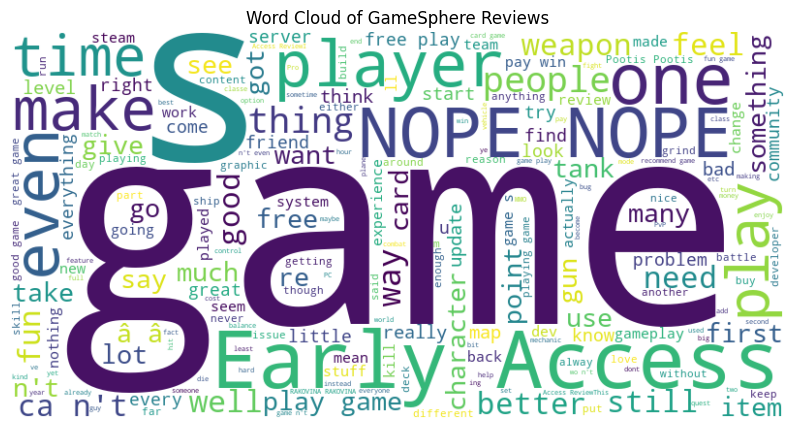

In [31]:
#Generating word clouds
# Combine all user reviews into a single string
all_reviews = " ".join(review for review in df_train['user_review'])

# Tokenize the combined string into words
words = word_tokenize(all_reviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a single string
filtered_reviews = " ".join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of GameSphere Reviews')
plt.show()

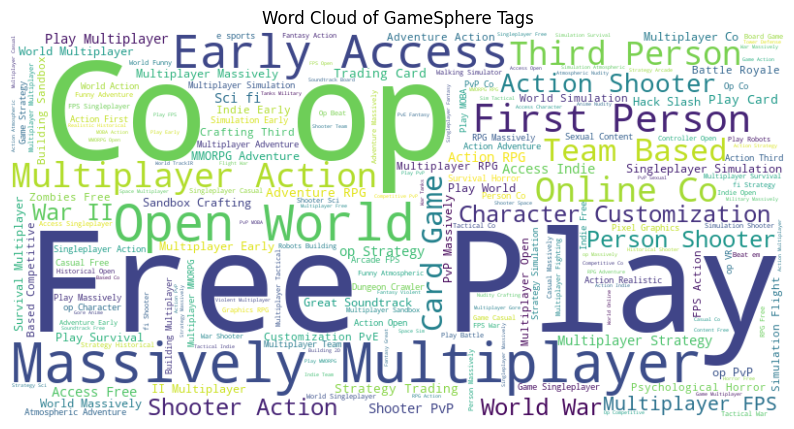

In [32]:
#Generating word clouds - tags
all_tags = " ".join(tag for tag in df_train['tags'])

# Tokenize the combined string into words
words = word_tokenize(all_tags)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a single string
filtered_reviews = " ".join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of GameSphere Tags')
plt.show()

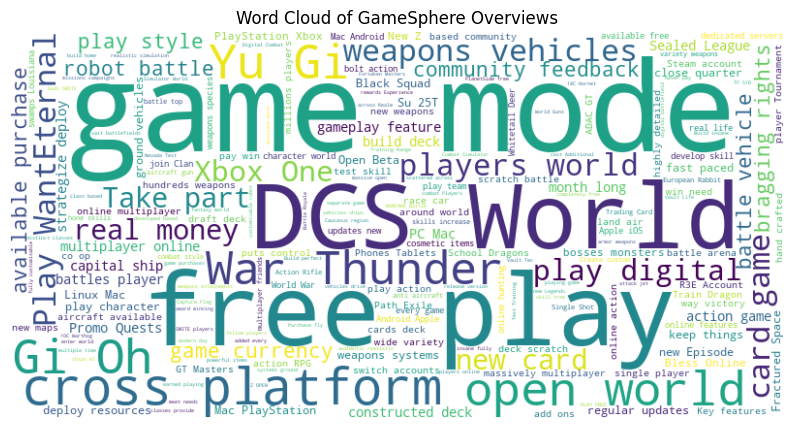

In [33]:
#Generating word clouds - overview
all_overviews = " ".join(review for review in df_train['overview'])

# Tokenize the combined string into words
words = word_tokenize(all_overviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the filtered words back into a single string
filtered_reviews = " ".join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_reviews)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of GameSphere Overviews')
plt.show()

Observations: <br>
1. Label is biased, so dataset contains more rows with sentiment value positive compared to negative for all features
2. Identified the features tags, review and overview has text-heavy compared to other categorical attributes, so calculated their respective count and generated word clouds for analyzing the text.
3. Boxplot of title by year contains some outliers
4. The plot mean year by sentiment seems to be equally distributed

## **Question 2 : Data Pre-processing & Feature Engineering** (20 pt)
- Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.
- Perform Feature Engineering on the dataset. Since this is a text-heavy dataset, you have to tokenize and pre-process the text data.

**Hints**:
- Check for any null values or duplicate rows in the dataset and perform necessary actions. Also, encoding categorical columns properly.
- Primary goal is to analyze reviews to predict sentiment. Such data requires a lot of pre-processing.
- You can start with using **regular expressions** to remove **links**, **HTML tags**, **unnecessary punctuation**, **emojis** (if any), etc.
- You can remove **stopwords** with very high or very low frequency across the reviews.
- You can also perform some advance techniques like **stemming** or **lemmatization** to further remove reduncancies.
- For feature engineering, you can use other techniques such as "**counter vectorization**" and "**tf-idf vectorization**" before modeling.

- Steps considering for cleaning and preparing the data for modeling

handling null values by filling it with mean for the year feature

In [34]:
df_train['year'] = df_train['year'].fillna(int(df_train['year'].mean()))

In [35]:
df_train.isnull().any()

review_id      False
title          False
developer      False
publisher      False
tags           False
overview       False
year           False
user_review    False
sentiment      False
dtype: bool

In [36]:
df_train.shape

(17319, 9)

Dropping duplicate rows if present

In [37]:
df_train.drop_duplicates(inplace=True)
df_train.shape

(17319, 9)

Dropping review ID column as it is of no use for model

In [38]:
df_train.drop(columns=['review_id'], inplace=True)

Encoding sentiment column

In [39]:
# Encoding categorical columns
columns = ['sentiment']
label_encoders = {}
for col in columns:
    label_encoders[col] = LabelEncoder()
    df_train[col] = label_encoders[col].fit_transform(df_train[col])

In [40]:
for col, encoder in label_encoders.items():
    print(f"Column: {col}")
    for original_label, encoded_value in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"Original Label: {original_label} -> Encoded Value: {encoded_value}")

Column: sentiment
Original Label: Negative -> Encoded Value: 0
Original Label: Positive -> Encoded Value: 1


Other columns are also categorical, but encoding them using label encoder and representing each unique text with a number makes no sense for constructing the model, so performing count & tf-idf vectorization as the model understands this better for text columns

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        17319 non-null  object 
 1   developer    17319 non-null  object 
 2   publisher    17319 non-null  object 
 3   tags         17319 non-null  object 
 4   overview     17319 non-null  object 
 5   year         17319 non-null  float64
 6   user_review  17319 non-null  object 
 7   sentiment    17319 non-null  int32  
dtypes: float64(1), int32(1), object(6)
memory usage: 1014.9+ KB


In [42]:
df_train.head()

title               developer  \
0                                             SMITE®      Titan Forge Games    
1  Business Tour - Board Game with Online Multipl...                Creobit    
2                                        Neverwinter        Cryptic Studios    
3                                    Team Fortress 2                  Valve    
4                                  School of Dragons  JumpStart Games, Inc.    

                      publisher  \
0               Hi-Rez Studios    
1                       8Floor    
2  Perfect World Entertainment    
3                        Valve    
4        JumpStart Games, Inc.    

                                                tags  \
0  ['Free to Play', 'MOBA', 'Multiplayer', 'Actio...   
1  ['Free to Play', 'Board Game', 'Strategy', 'Ma...   
2  ['Free to Play', 'MMORPG', 'RPG', 'Massively M...   
3  ['Free to Play', 'Multiplayer', 'FPS', 'Action...   
4  ['Free to Play', 'Dragons', 'Adventure', 'Mult...   

                                            overview    year  \
0  Enter the Battleground of the GodsJoin the mil...  2016.0   
1  "Business Tour" simple and entertaining gamepl...  2018.0   
2                                                     2014.0   
3  "The most fun you can have online" - PC GamerI...  2014.0   
4  **Changewing Dragon now Available**Fly Fast. T...  2017.0   

                                         user_review  sentiment  
0  I've played this game since before beta ended,...          1  
1  fun little game , but you really need to put a...          1  
2  First of all this is not a pay to win game. ZE...          1  
3  this game  have all   very funny  and tactical...          1  
4  This is a great game, it really is. I understa...          1

In [43]:
df_train['title'].unique()

array(['SMITE®', 'Business Tour - Board Game with Online Multiplayer',
       'Neverwinter', 'Team Fortress 2', 'School of Dragons',
       'Heroes & Generals', 'Fallout Shelter', 'Bless Online',
       'Crusaders of the Lost Idols', 'Bloons TD Battles',
       'RaceRoom Racing Experience', 'AdventureQuest 3D',
       'Fractured Space', 'War Thunder', "Spooky's Jump Scare Mansion",
       'Infestation: The New Z', 'Realm Royale', 'Elsword',
       'PlanetSide 2', 'World of Tanks Blitz', 'Robocraft', 'Trove',
       'The Elder Scrolls®: Legends™', 'Dreadnought', 'Dota 2',
       'Eternal Card Game', 'Realm of the Mad God', 'WARMODE',
       'Black Squad', 'Ring of Elysium', 'theHunter Classic',
       'Cuisine Royale', 'Brawlhalla', 'World of Guns: Gun Disassembly',
       'Creativerse', 'Tactical Monsters Rumble Arena', 'Shop Heroes',
       'Sakura Clicker', 'Freestyle 2: Street Basketball',
       'Realm Grinder', 'Path of Exile', 'Yu-Gi-Oh! Duel Links',
       'DCS World Steam Editi

- Some of other features are also categorical, but encoding them using label encoder and representing each unique text with a number makes no sense for constructing the model, so performing below steps as the model understands this better for text columns
1. Text pre-processing - removing HTML tags, punctuations, emojis and converting to lower case
2. Removing stop words
3. Lemmatization
4. TF-IDF Vectorization

In [44]:
# Text Data Preprocessing
def preprocess_text(text):
    # Remove links, HTML tags, and unnecessary punctuation
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove emojis
    text = re.sub(r'[\uD800-\uDBFF][\uDC00-\uDFFF]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

In [45]:
#applying preprocessing to title, overview and user_review columns
df_train['user_review'] = df_train['user_review'].apply(preprocess_text)
df_train['title'] = df_train['title'].apply(preprocess_text)
df_train['overview'] = df_train['overview'].apply(preprocess_text)
df_train['tags'] = df_train['tags'].apply(preprocess_text)

In [46]:
df_train.head()

title               developer  \
0                                              smite      Titan Forge Games    
1  business tour  board game with online multiplayer                Creobit    
2                                        neverwinter        Cryptic Studios    
3                                    team fortress 2                  Valve    
4                                  school of dragons  JumpStart Games, Inc.    

                      publisher  \
0               Hi-Rez Studios    
1                       8Floor    
2  Perfect World Entertainment    
3                        Valve    
4        JumpStart Games, Inc.    

                                                tags  \
0  free to play moba multiplayer action third per...   
1  free to play board game strategy massively mul...   
2  free to play mmorpg rpg massively multiplayer ...   
3  free to play multiplayer fps action shooter cl...   
4  free to play dragons adventure multiplayer mas...   

                                            overview    year  \
0  enter the battleground of the godsjoin the mil...  2016.0   
1  business tour simple and entertaining gameplay...  2018.0   
2                                                     2014.0   
3  the most fun you can have online  pc gameris n...  2014.0   
4  changewing dragon now availablefly fast train ...  2017.0   

                                         user_review  sentiment  
0  ive played this game since before beta ended i...          1  
1  fun little game  but you really need to put a ...          1  
2  first of all this is not a pay to win game zen...          1  
3  this game  have all   very funny  and tactical...          1  
4  this is a great game it really is i understand...          1

In [47]:
#removing stopwords from title, overview and user_review columns
stop_words = set(stopwords.words('english'))
df_train['title'] = df_train['title'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
df_train['user_review'] = df_train['user_review'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
df_train['overview'] = df_train['overview'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
df_train['tags'] = df_train['tags'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))

In [50]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
df_train['title'] = df_train['title'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))
df_train['overview'] = df_train['overview'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))
df_train['user_review'] = df_train['user_review'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))
df_train['tags'] = df_train['tags'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))

In [51]:
df_train.head()

title               developer  \
0                                        smite      Titan Forge Games    
1  business tour board game online multiplayer                Creobit    
2                                  neverwinter        Cryptic Studios    
3                              team fortress 2                  Valve    
4                                school dragon  JumpStart Games, Inc.    

                      publisher  \
0               Hi-Rez Studios    
1                       8Floor    
2  Perfect World Entertainment    
3                        Valve    
4        JumpStart Games, Inc.    

                                                tags  \
0  free play moba multiplayer action third person...   
1  free play board game strategy massively multip...   
2  free play mmorpg rpg massively multiplayer adv...   
3  free play multiplayer fps action shooter class...   
4  free play dragon adventure multiplayer massive...   

                                            overview    year  \
0  enter battleground godsjoin million smite play...  2016.0   
1  business tour simple entertaining gameplay all...  2018.0   
2                                                     2014.0   
3  fun online pc gameris free there catch play mu...  2014.0   
4  changewing dragon availablefly fast train hard...  2017.0   

                                         user_review  sentiment  
0  ive played game since beta ended im pretty add...          1  
1  fun little game really need put vote kick opti...          1  
2  first pay win game zen currency buy real money...          1  
3  game funny tactical want playing like 6 month ...          1  
4  great game really understand membership thing ...          1

In [117]:
# TF-IDF Vectorization
tfidf_vectorization = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
reviews = tfidf_vectorization.fit_transform(df_train['user_review'])

In [118]:
feature_wrds = tfidf_vectorization.get_feature_names_out()

In [58]:
X = pd.DataFrame(reviews.toarray(), columns=feature_wrds)

In [60]:
y=df_train['sentiment']

In [61]:
X.shape

(17319, 1000)

In [62]:
y.shape

(17319,)

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Question 3 : Modeling** (20 pt)

- You are supposed to train a **Logistic Regression Classifier** along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.
- Implement a validation pipeline utilizing 5-fold cross-validation.
- For each classifier, report **F1 score**, **Precision**, **Recall**, **Accuracy**, **ROC-AUC**, and **Cross-validation** score).
- Also, for each model, **plot the ROC-AUC curve**.
- Describe and discuss your findings.

**Hint**:
- To calculate the ROC-AUC scores, you need to predict the probabilites of the classes instead of the classes themselves. You can refer to the sklearn documentation for [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for more information.

### Training Individual classifiers

#### Logistic Regression

In [64]:
logistic_regression_clf = LogisticRegression()

In [65]:
logistic_regression_clf.fit(X_train, y_train)

LogisticRegression()

In [66]:
logistic_regression_pred = logistic_regression_clf.predict(X_val)

In [67]:
logistic_regression_accuracy = accuracy_score(y_val, logistic_regression_pred)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

Logistic Regression Accuracy: 0.8253464203233256


In [68]:
roc_auc_score(y_val, logistic_regression_pred)

0.818630021563173

#### Random Forest classifier

In [69]:
random_forest_clf = RandomForestClassifier()

In [70]:
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
random_forest_pred = random_forest_clf.predict(X_val)

In [72]:
random_forest_accuracy = accuracy_score(y_val, random_forest_pred)
print("Random Forest Accuracy:", random_forest_accuracy)

Random Forest Accuracy: 0.8112009237875288


In [73]:
roc_auc_score(y_val, random_forest_pred)

0.8019178796804991

#### XGBoost Classifier

In [74]:
xgb_clf = XGBClassifier()

In [75]:
xgb_clf.fit(X_train,y_train)
xgb_pred = xgb_clf.predict(X_val) 

In [76]:
xgb_accuracy = accuracy_score(y_val, xgb_pred)
print("XGB Accuracy:", xgb_accuracy)

XGB Accuracy: 0.8080254041570438


In [77]:
roc_auc_score(y_val, xgb_pred)

0.7989834991881377

#### Gradient Boost Classifier

In [83]:
gb_clf = GradientBoostingClassifier()

In [84]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [85]:
gb_pred = gb_clf.predict(X_val) 

In [86]:
gb_accuracy = accuracy_score(y_val, gb_pred)
print("Gradient Boost Accuracy:", xgb_accuracy)

Gradient Boost Accuracy: 0.8080254041570438


In [93]:
knn_clf = KNeighborsClassifier()

In [94]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
knn_pred = knn_clf.predict(X_val) 

In [96]:
knn_accuracy = accuracy_score(y_val, knn_pred)
print("Gradient Boost Accuracy:", knn_accuracy)

Gradient Boost Accuracy: 0.5915127020785219


### Optimizing using Grid search cv

In [97]:
param_grid_gb = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
param_grid_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 30]}
param_grid_logistic = {'C': [0.01, 0.1, 1]}
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

In [98]:
# Perform GridSearchCV for each model
grid_logistic = GridSearchCV(logistic_regression_clf, param_grid_logistic, cv=5, scoring='roc_auc')
grid_forest = GridSearchCV(random_forest_clf, param_grid_forest, cv=5, scoring='roc_auc')
grid_gb = GridSearchCV(gb_clf, param_grid_gradient_boost, cv=5, scoring='roc_auc')
grid_knn = GridSearchCV(knn_clf, param_grid_knn, cv=5, scoring='roc_auc')

In [103]:
# Fit the models
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1]}, scoring='roc_auc')

In [105]:
grid_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [99]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [106]:
# Print best parameters for each model
print("Logistic Regression Best Parameters:", grid_logistic.best_params_)
print("Random Forest Best Parameters:", grid_forest.best_params_)
#print("Gradient Boosting Best Parameters:", grid_gradient_boost.best_params_)
print("KNN Best Parameters:",grid_knn.best_params_)

Logistic Regression Best Parameters: {'C': 1}
Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 200}
KNN Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [107]:
best_logistic_model = grid_logistic.best_estimator_
best_random_forest_model = grid_forest.best_estimator_
#best_gb_model = grid_gb.best_estimator_
best_knn_model=grid_knn.best_estimator_

Logistic Regression Cross-Validation Score (Accuracy): 0.8232407073258752
Logistic Regression Cross-Validation Score (Precision): 0.831280185739649
Logistic Regression Cross-Validation Score (Recall): 0.864294790343075
Logistic Regression Cross-Validation Score (F1): 0.8474429110112623
Logistic Regression Cross-Validation Score (ROC_AUC): 0.9044205706982407
Random Forest Cross-Validation Score (Accuracy): 0.8026705160591844
Random Forest Cross-Validation Score (Precision): 0.8014673035537069
Random Forest Cross-Validation Score (Recall): 0.8672172808132148
Random Forest Cross-Validation Score (F1): 0.8325581412286513
Random Forest Cross-Validation Score (ROC_AUC): 0.8785309313096379
KNN Cross-Validation Score (Accuracy): 0.5587152652472032
KNN Cross-Validation Score (Precision): 0.612935814708865
KNN Cross-Validation Score (Recall): 0.8011435832274459
KNN Cross-Validation Score (F1): 0.6128169650829293
KNN Cross-Validation Score (ROC_AUC): 0.5536606233924498


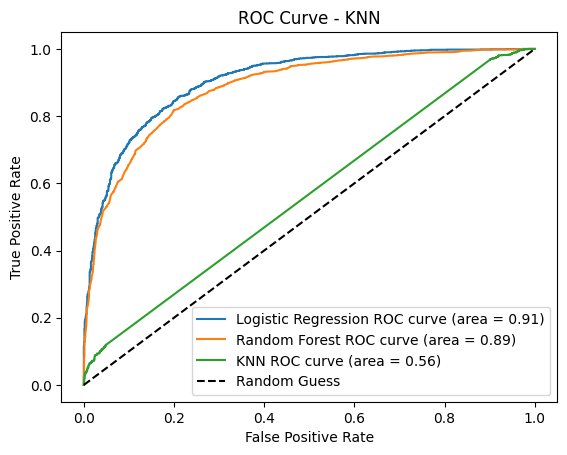

In [108]:
#Implementing a validation pipeline utilizing 5-fold cross-validation.
def evaluate_model(model, name):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train, y_train, cv=skf, scoring='precision')
    cv_recall = cross_val_score(model, X_train, y_train, cv=skf, scoring='recall')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    cv_roc_auc=cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc')

    print(f"{name} Cross-Validation Score (Accuracy): {cv_accuracy.mean()}")
    print(f"{name} Cross-Validation Score (Precision): {cv_precision.mean()}")
    print(f"{name} Cross-Validation Score (Recall): {cv_recall.mean()}")
    print(f"{name} Cross-Validation Score (F1): {cv_f1.mean()}")
    print(f"{name} Cross-Validation Score (ROC_AUC): {cv_roc_auc.mean()}")

    # ROC-AUC curve
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')

# Evaluate models and plot ROC-AUC curve

evaluate_model(best_logistic_model, "Logistic Regression")
evaluate_model(best_random_forest_model, "Random Forest")
evaluate_model(best_knn_model, "KNN")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.legend(loc='lower right')
plt.show()

1. Trained individual classifiers like logistic regression, random forest, xgboost, gradient boost and knn.
2. Observed logistic regression performs well with roc_auc score 0.81 and accuracy 82.5% on validation set.
3. Optimized parameters of logistic, random forest and k-nearest neighbours using grid search (skipped xgboost & gradient boost as taking longer time), and implemented a validation pipeline utilizing 5-fold cross-validation
4. FFor each classifier, reporedt F1 score, Precision, Recall, Accuracy, ROC-AUC, and Cross-validation scor along with ROC-AUC curve.
5. Among all models, considering Logistic Regression model with best parameters through grid search as the final model with ROC-AUC score 0.90.. 

## **Question 4 : Evaluation and Reporting** (20 pt)

- Select a model that is expected to perform optimally on the unseen data and provide the predicted sentiments accordingly.
- Give clear conclusions.

In [109]:
#Using the model from above
final_model = best_logistic_model
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_train)
pred_probabilities = final_model.predict_proba(X_train)[:,1]
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on Training Data: {accuracy}")
roc_auc_score_=roc_auc_score(y_train, y_pred)
print('The ROC_AUC score is : ', roc_auc_score_)

Accuracy on Training Data: 0.8483579935041501
The ROC_AUC score is :  0.8425066796597593


- Considering Logistic model as the final best model for external validation as it performed well compared to other models in terms of accuracy and roc_auc score

## **Question 5 : External validation** (30 pt)

- A dataset named '`test.csv`' is provided to you in which the sentiment label is hidden.
- You have to choose the best model (the classifier which has the highest ROC-AUC score) and then use that model to predict the probabilities of sentiment on the '`test.csv`'.
- After prediction, you will get a 2D array of probabilities for each sentiment. Select the 2nd column of probabilites for your submission.

```
# Fit
your_best_model = model.fit(x_train)

# Calculate the probabilities of both classes and extract the probabilities of positive class
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# Evaluate/Submit
---
```

- Convert that final array into a csv file, name it as '`submission.csv`' and submit that '`submission.csv`' file.

In [110]:
# Text Data Preprocessing
def preprocess_text(text):
    # Remove links, HTML tags, and unnecessary punctuation
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove emojis
    text = re.sub(r'[\uD800-\uDBFF][\uDC00-\uDFFF]', '', text)
    # Convert text to lowercase
    text = text.lower()
    return text

In [119]:
#preprocess_data function used for test data
def preprocess_data(df):
    #applying preprocessing to title, overview and user_review columns
    df['user_review'] = df['user_review'].apply(preprocess_text)
    #removing stopwords from title, overview and user_review columns
    stop_words = set(stopwords.words('english'))
    df['user_review'] = df['user_review'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    df['user_review'] = df['user_review'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))
    # TF-IDF Vectorization
    reviews = tfidf_vectorization.transform(df['user_review'])
    feature_wrds = tfidf_vectorization.get_feature_names_out()
    X = pd.DataFrame(reviews.toarray(), columns=feature_wrds)
     
    return X

In [120]:
# step 1. Load the  data
test = pd.read_csv('./data/test.csv')

# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
x_test = preprocess_data(test)

# step 3. Choose the best model
your_best_model = final_model

# step 4. Make predictions of probabilites using sklearn's model.predict_proba() method
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# step 5. Save output as csv file
pred_probabilities = pd.DataFrame(pred_probabilities, columns=['PositiveSentimentProbability'])
pred_probabilities.to_csv('./submission.csv', index = False)
print('file saved')

file saved
